# Importando bibliotecas

In [44]:
import numpy as np         # para fazer contas e mexer com matrizes
import pandas as pd        # para montar DataFrames (tabelas de bancos de dados)

import matplotlib.pyplot as plt
import seaborn as sns

import modelos as m

#Para esconder os avisos do curvefit():
import warnings
warnings.filterwarnings("ignore")

# para não precisar reiniciar o kernel do jupyter-notebook quando mudar os arquivos .py
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Lendo dados

In [45]:
dadosdf = m.carrega_pickles()

dadosdf_resultados = m.carrega_pickles()

Lendo porquinho_mra26.pickle			
Lendo porquinho_mra28.pickle			
Lendo porquinho_mra29.pickle			
Lendo porquinho_mra31.pickle			
Lendo porquinho_mra32.pickle			
Lendo porquinho_mra33.pickle			
Lendo porquinho_mra34.pickle			
Lendo porquinho_mra26.pickle			
Lendo porquinho_mra28.pickle			
Lendo porquinho_mra29.pickle			
Lendo porquinho_mra31.pickle			
Lendo porquinho_mra32.pickle			
Lendo porquinho_mra33.pickle			
Lendo porquinho_mra34.pickle			


In [46]:
dadosdf.head(5)

,Animal,Manobra,Dados,n_steps,Pressoes,Volumes,volume_esperado
0,mra26,B,"[[10.25, -145.76797485351562], [20.61562538146...",3,"[10.25, 15.334375381469727, 20.375]","[-145.76797485351562, -37.26432800292969, 166....",0
1,mra26,D,"[[10.178125381469727, -197.8517303466797], [20...",5,"[10.178125381469727, 15.212499618530273, 20.42...","[-197.8517303466797, -95.13343811035156, 97.13...",0
2,mra26,C,"[[10.131250381469727, -147.3227081298828], [20...",4,"[10.131250381469727, 15.112500190734863, 20.27...","[-147.3227081298828, -36.04450607299805, 131.8...",0
3,mra28,C,"[[10.287500381469727, -152.2864532470703], [20...",4,"[10.287500381469727, 14.931250095367432, 20.21...","[-152.2864532470703, -45.45492172241211, 234.1...",0
4,mra28,B,"[[10.021874904632568, -128.87612915039062], [2...",3,"[10.021874904632568, 14.962499618530273, 20.01...","[-128.87612915039062, -2.0903725624084473, 208...",0


## Incluindo volume esperado no dataframe

In [47]:
v_esperado = {
    "mra26": 2622.9,
    "mra28": 2105.9,
    "mra29": 2205.7,
    "mra31": 1974.4,
    "mra32": 1440.2,
    "mra33": 2154.6,
    "mra34": 2211.2
}

dadosdf["volume_esperado"] = dadosdf.apply(lambda row: v_esperado[row.Animal], axis=1)
dadosdf["Modelo"] = ""
dadosdf["Metodo"] = ""
dadosdf["Ajustado"] = ""
dadosdf["Erro"] = ""

df_final = pd.DataFrame()
df_final['modelo'] = ""
df_final['metodo'] = ""
df_final['norma_do_erro'] = ""
df_final['erro_medio'] = ""
df_final['ajustados'] = ""

dadosdf.head(5)

,Animal,Manobra,Dados,n_steps,Pressoes,Volumes,volume_esperado,Modelo,Metodo,Ajustado,Erro
0,mra26,B,"[[10.25, -145.76797485351562], [20.61562538146...",3,"[10.25, 15.334375381469727, 20.375]","[-145.76797485351562, -37.26432800292969, 166....",2622.9,,,,
1,mra26,D,"[[10.178125381469727, -197.8517303466797], [20...",5,"[10.178125381469727, 15.212499618530273, 20.42...","[-197.8517303466797, -95.13343811035156, 97.13...",2622.9,,,,
2,mra26,C,"[[10.131250381469727, -147.3227081298828], [20...",4,"[10.131250381469727, 15.112500190734863, 20.27...","[-147.3227081298828, -36.04450607299805, 131.8...",2622.9,,,,
3,mra28,C,"[[10.287500381469727, -152.2864532470703], [20...",4,"[10.287500381469727, 14.931250095367432, 20.21...","[-152.2864532470703, -45.45492172241211, 234.1...",2105.9,,,,
4,mra28,B,"[[10.021874904632568, -128.87612915039062], [2...",3,"[10.021874904632568, 14.962499618530273, 20.01...","[-128.87612915039062, -2.0903725624084473, 208...",2105.9,,,,


## Testando modelos

### Teste 1

#### Modelo sigmoidvenegas1 - Sem estimativa inicial, sem condições de contorno.
#### Método lm

	Caso 0 (mra26) deu erro... Steps:3
Testando caso 1: mra26: [  176.3    72.1 1818072.3 360298.5 ]
	Caso 1 (mra26) deu erro... Steps:5
	Caso 2 (mra26) deu erro... Steps:4
Testando caso 3: mra28: [  148.6    79.8 1130672.4 154783.9 ]
	Caso 3 (mra28) deu erro... Steps:4
	Caso 4 (mra28) deu erro... Steps:3
Testando caso 5: mra28: [ -297.5  1384.2    23.7     5.6 ]
Testando caso 6: mra29: [  114.8    75.1 1231607.5 220982.2 ]
	Caso 7 (mra29) deu erro... Steps:3
Testando caso 8: mra29: [ -342.9  1219.1    23.2     4.9 ]
Testando caso 9: mra31: [ -327.8  1137.7    20.1     7.1 ]
	Caso 10 (mra31) deu erro... Steps:3
Testando caso 11: mra31: [ -367.2  1070.9    21.0     6.0 ]
Testando caso 12: mra32: [ -139.8   634.8    20.6     5.3 ]
Testando caso 13: mra32: [-8274.7 -8141.1 458776.9 -105827.6 ]
	Caso 14 (mra32) deu erro... Steps:3
Testando caso 15: mra33: [ -498.8  4714.3    37.6    11.8 ]
	Caso 16 (mra33) deu erro... Steps:3
Testando caso 17: mra33: [ -303.9  1431.4    21.6     7.3 ]
Testand

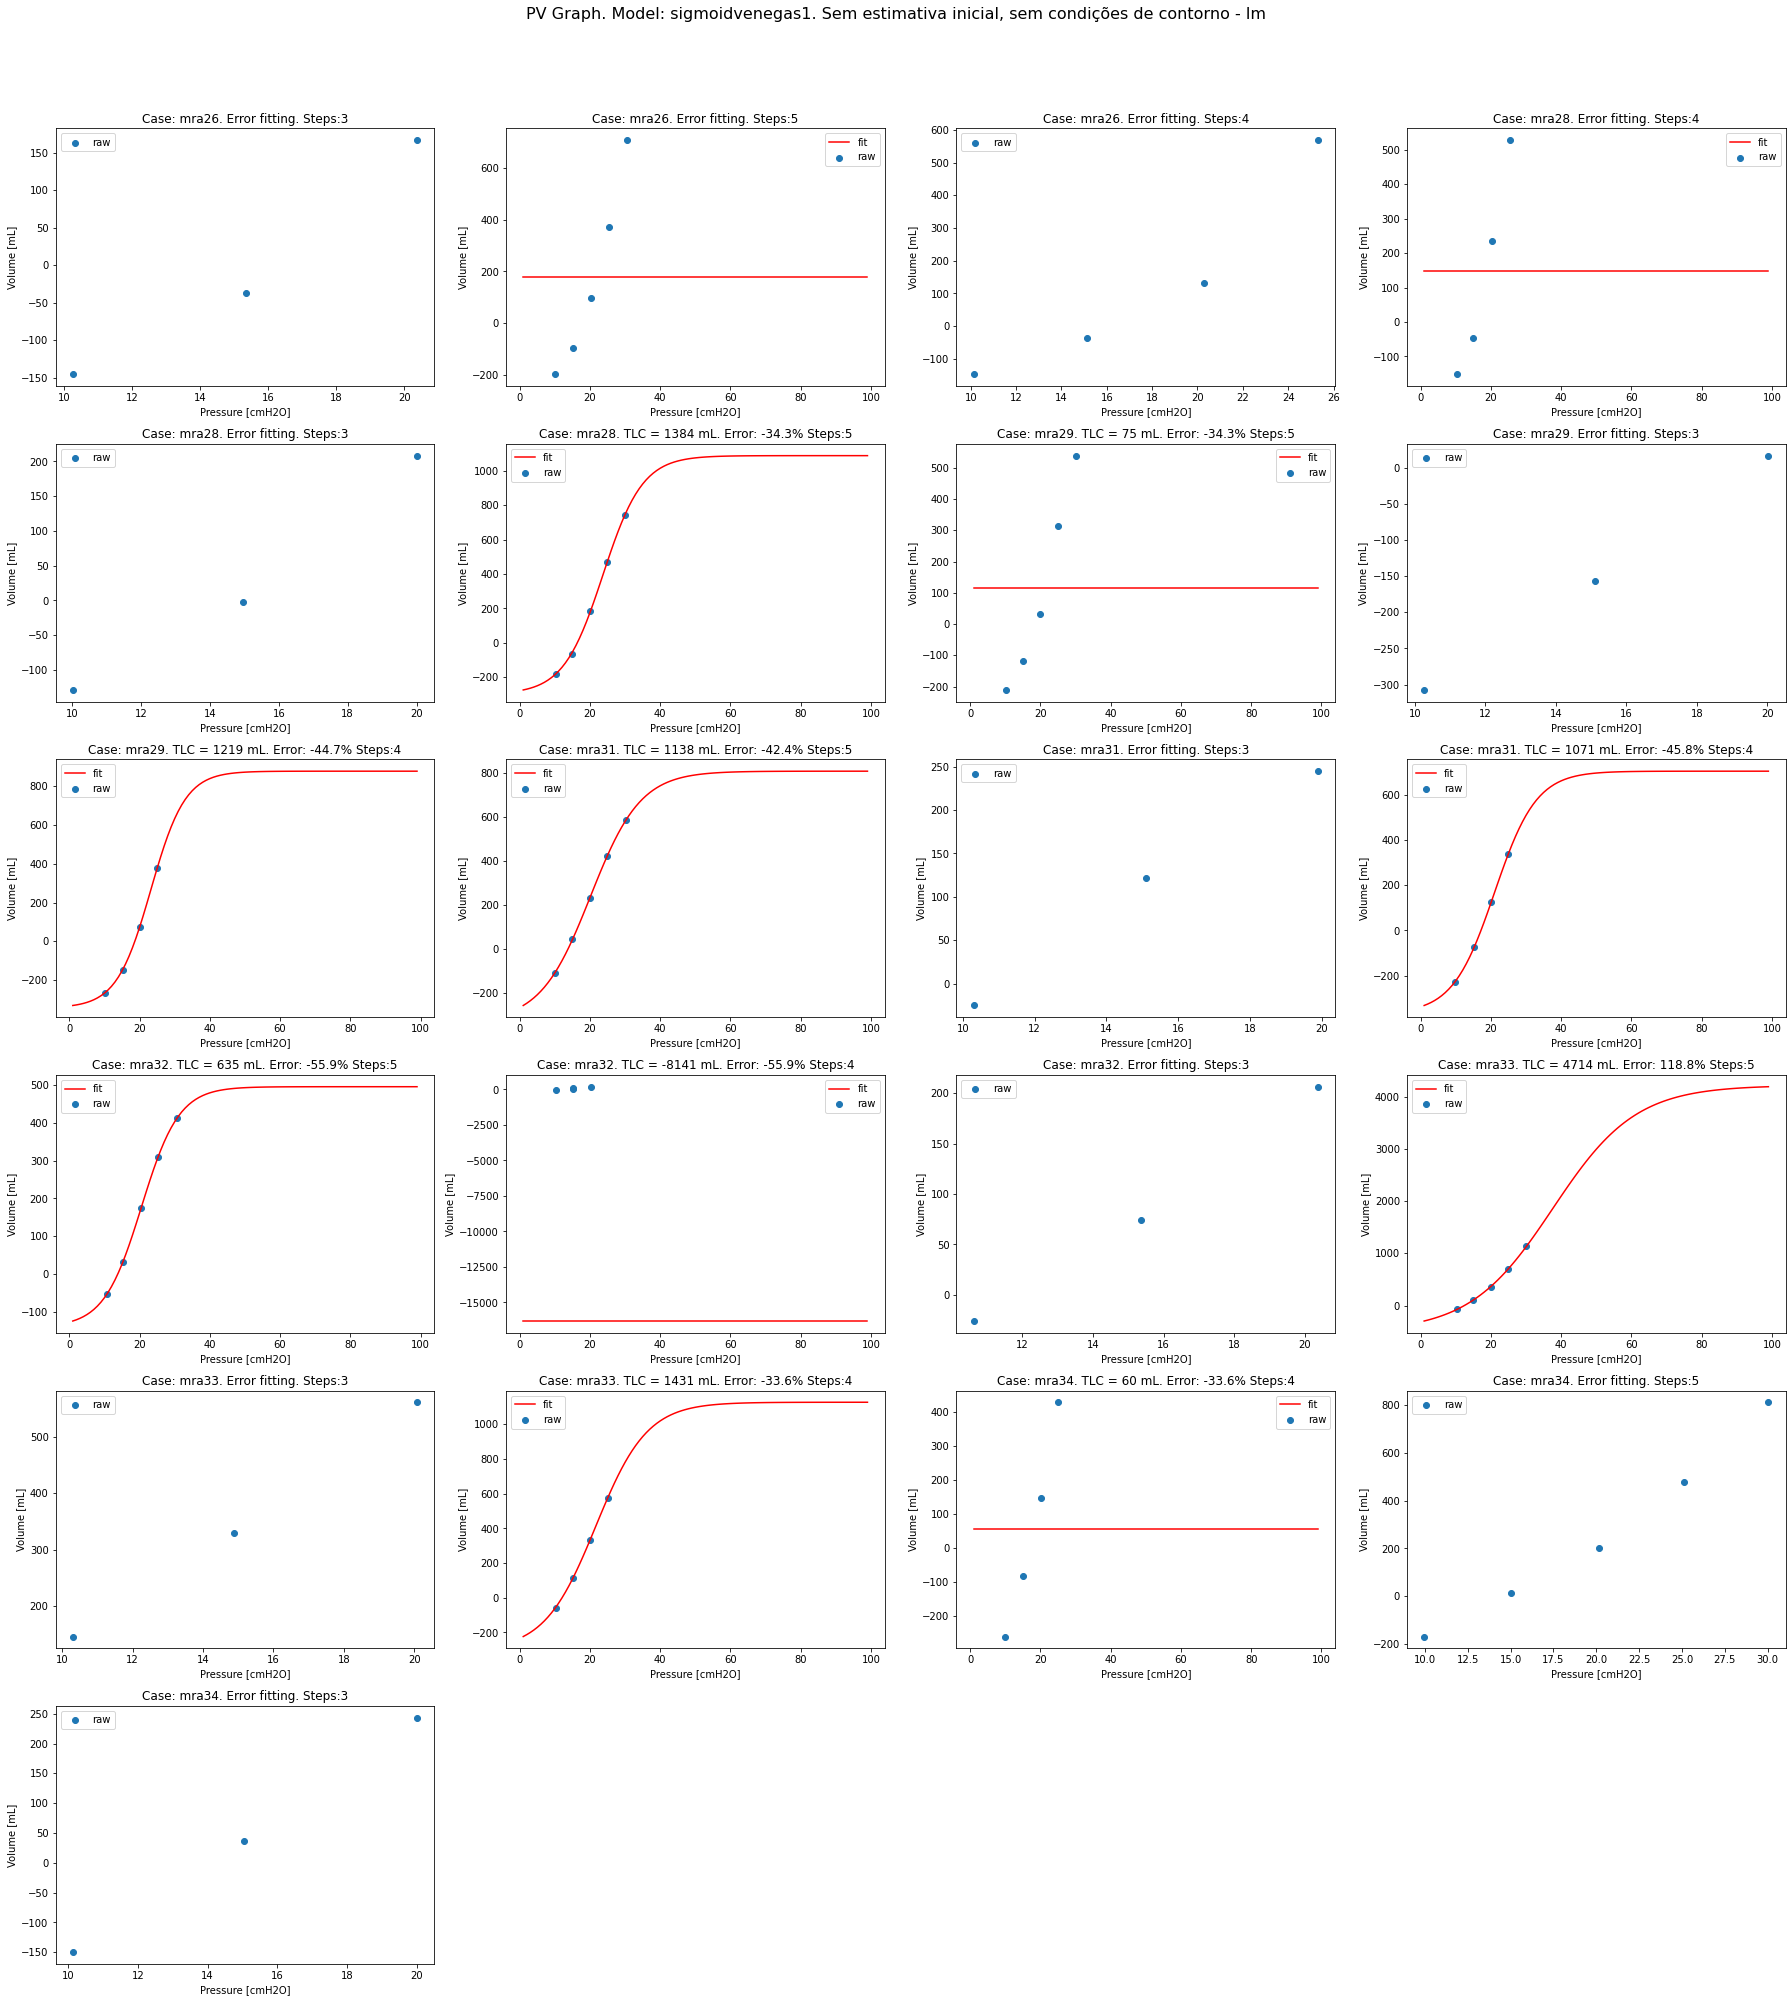

Norma(erro): 159.5. Erro médio: 53.63%. Ajustados: 7.


In [48]:
modelo = m.sigmoidvenegas1
metodo = 'lm'
texto = 'Sem estimativa inicial, sem condições de contorno - lm'
TLC_index = 1
_, _, _, df_final = m.testa_modelo(dadosdf, modelo, metodo=metodo, texto=texto, TLC_index=TLC_index, df_final=df_final)
df_resultados = pd.concat([dadosdf], ignore_index=True)

#### Modelo sigmoidvenegas1 - Sem estimativa inicial, sem condições de contorno.
#### Método dogbox

Testando caso 0: mra26: [  166.6  -312.4    15.5 -0.245 ]
	Caso 0 (mra26) deu erro... Steps:3
Testando caso 1: mra26: [ -294.7  1695.6    28.1     6.4 ]
	Caso 2 (mra26) deu erro... Steps:4
Testando caso 3: mra28: [  -89.9   477.1    17.7 0.038 ]
Testando caso 4: mra28: [ -128.9   337.3    15.1 0.269 ]
	Caso 5 (mra28) deu erro... Steps:5
Testando caso 6: mra29: [ -163.2   463.7    18.7 0.030 ]
Testando caso 7: mra29: [   16.6  -324.1    15.2 -0.110 ]
Testando caso 8: mra29: [ -207.6   432.8    17.8 0.045 ]
	Caso 9 (mra31) deu erro... Steps:5
Testando caso 10: mra31: [  -25.0   269.7    15.1 0.094 ]
Testando caso 11: mra31: [ -367.2  1070.9    21.0     6.0 ]
Testando caso 12: mra32: [ -139.8   634.8    20.6     5.3 ]
Testando caso 13: mra32: [-8155.3 -8155.3     1.0 0.186 ]
Testando caso 14: mra32: [  -25.9   232.2    15.6 0.240 ]
Testando caso 15: mra33: [ -498.8  4714.3    37.6    11.8 ]
Testando caso 16: mra33: [   80.7   562.1    15.5     2.6 ]
Testando caso 17: mra33: [ -303.9  1431

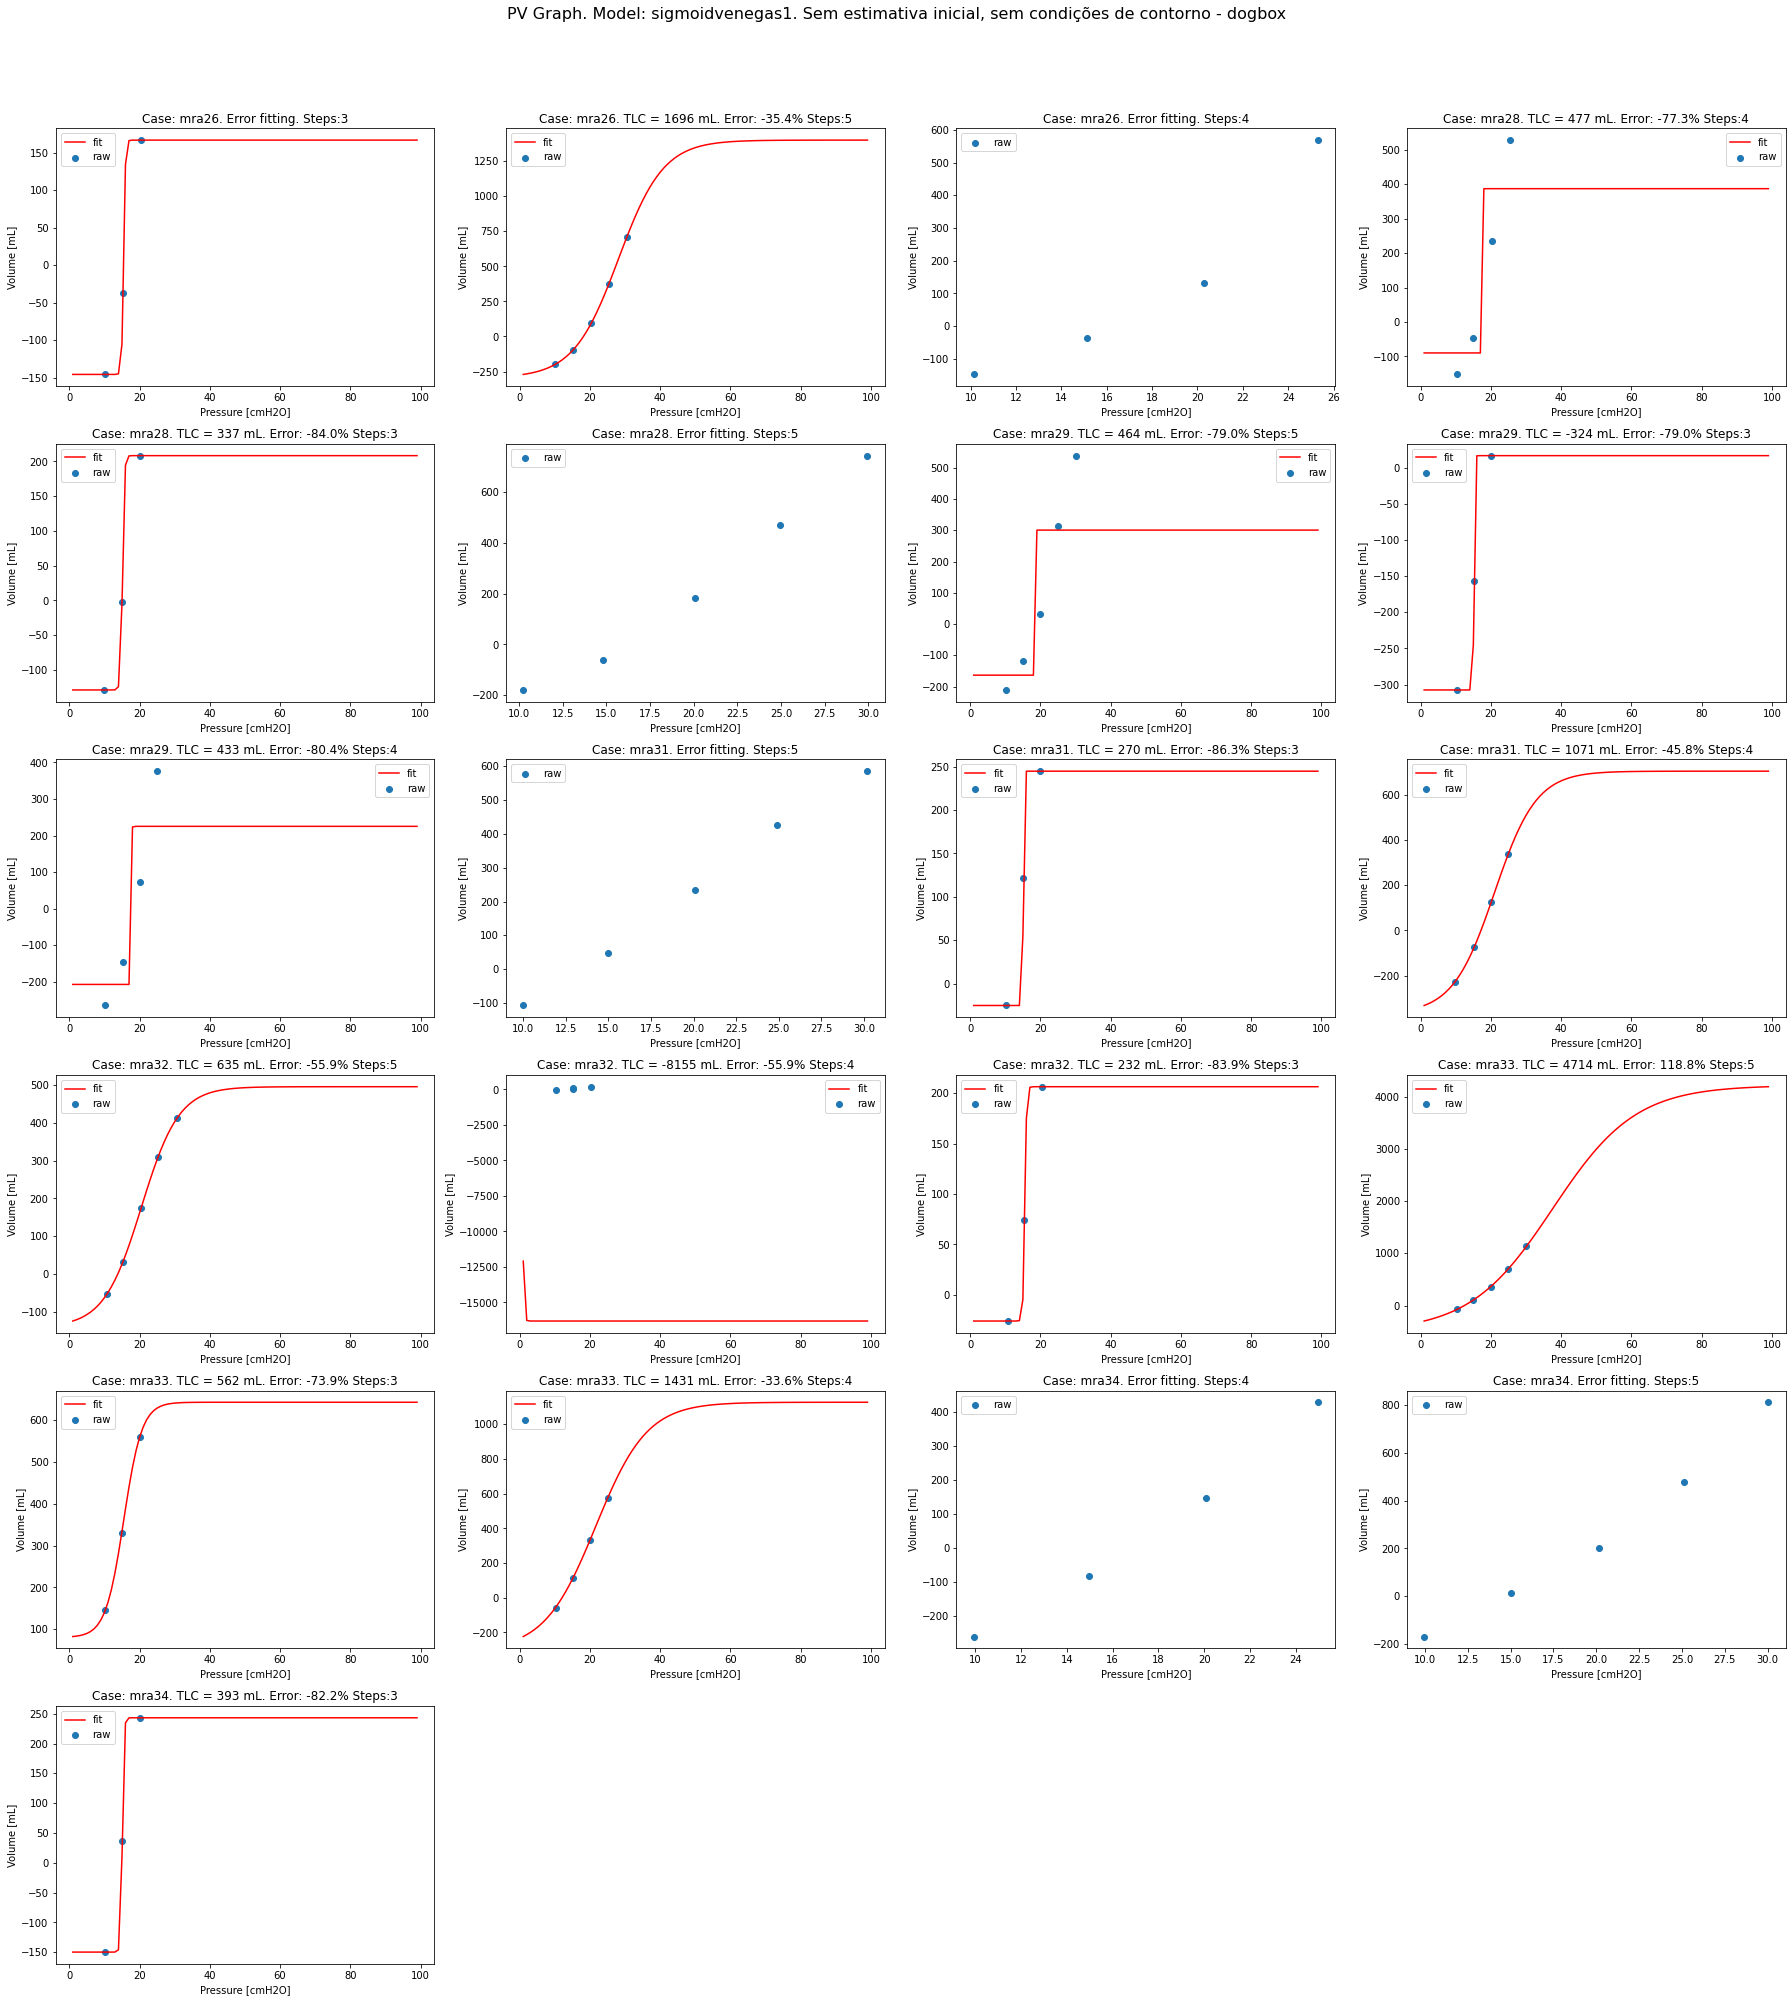

Norma(erro): 272.3. Erro médio: 72.04%. Ajustados: 13.


In [49]:
modelo = m.sigmoidvenegas1
metodo = 'dogbox'
texto = 'Sem estimativa inicial, sem condições de contorno - dogbox'
TLC_index = 1
dadosdf["Modelo"] = ""
dadosdf["Metodo"] = ""
dadosdf["Ajustado"] = ""
dadosdf["Erro"] = ""
_, _, _, df_final = m.testa_modelo(dadosdf, modelo, metodo=metodo, texto=texto, TLC_index=TLC_index, df_final=df_final)
df_resultados = pd.concat([df_resultados, dadosdf], ignore_index=True)

#### Modelo sigmoidvenegas1 - Sem estimativa inicial, sem condições de contorno.
#### Método trf

Testando caso 0: mra26: [  166.6  -258.5    16.4 -0.024 ]
	Caso 0 (mra26) deu erro... Steps:3
Testando caso 1: mra26: [ -294.7  1695.6    28.1     6.4 ]
	Caso 2 (mra26) deu erro... Steps:4
Testando caso 3: mra28: [ -202.9   921.0    20.6     3.6 ]
Testando caso 4: mra28: [ -128.9   337.3    15.1 0.247 ]
Testando caso 5: mra28: [ -297.5  1384.2    23.7     5.6 ]
Testando caso 6: mra29: [ -247.6   968.3    23.7     4.3 ]
Testando caso 7: mra29: [   16.6  -324.1    15.2 -0.236 ]
Testando caso 8: mra29: [ -342.9  1219.1    23.2     4.9 ]
Testando caso 9: mra31: [  -29.3   448.3    19.7 0.003 ]
Testando caso 10: mra31: [  -25.0   269.7    15.1 0.233 ]
Testando caso 11: mra31: [ -367.2  1070.9    21.0     6.0 ]
Testando caso 12: mra32: [ -139.8   634.8    20.6     5.3 ]
Testando caso 13: mra32: [-3998.0 -12312.6   382.7    -4.4 ]
Testando caso 14: mra32: [  -25.9   232.2    15.6 0.242 ]
Testando caso 15: mra33: [ -498.8  4714.3    37.6    11.8 ]
Testando caso 16: mra33: [  712.8  -685.0    1

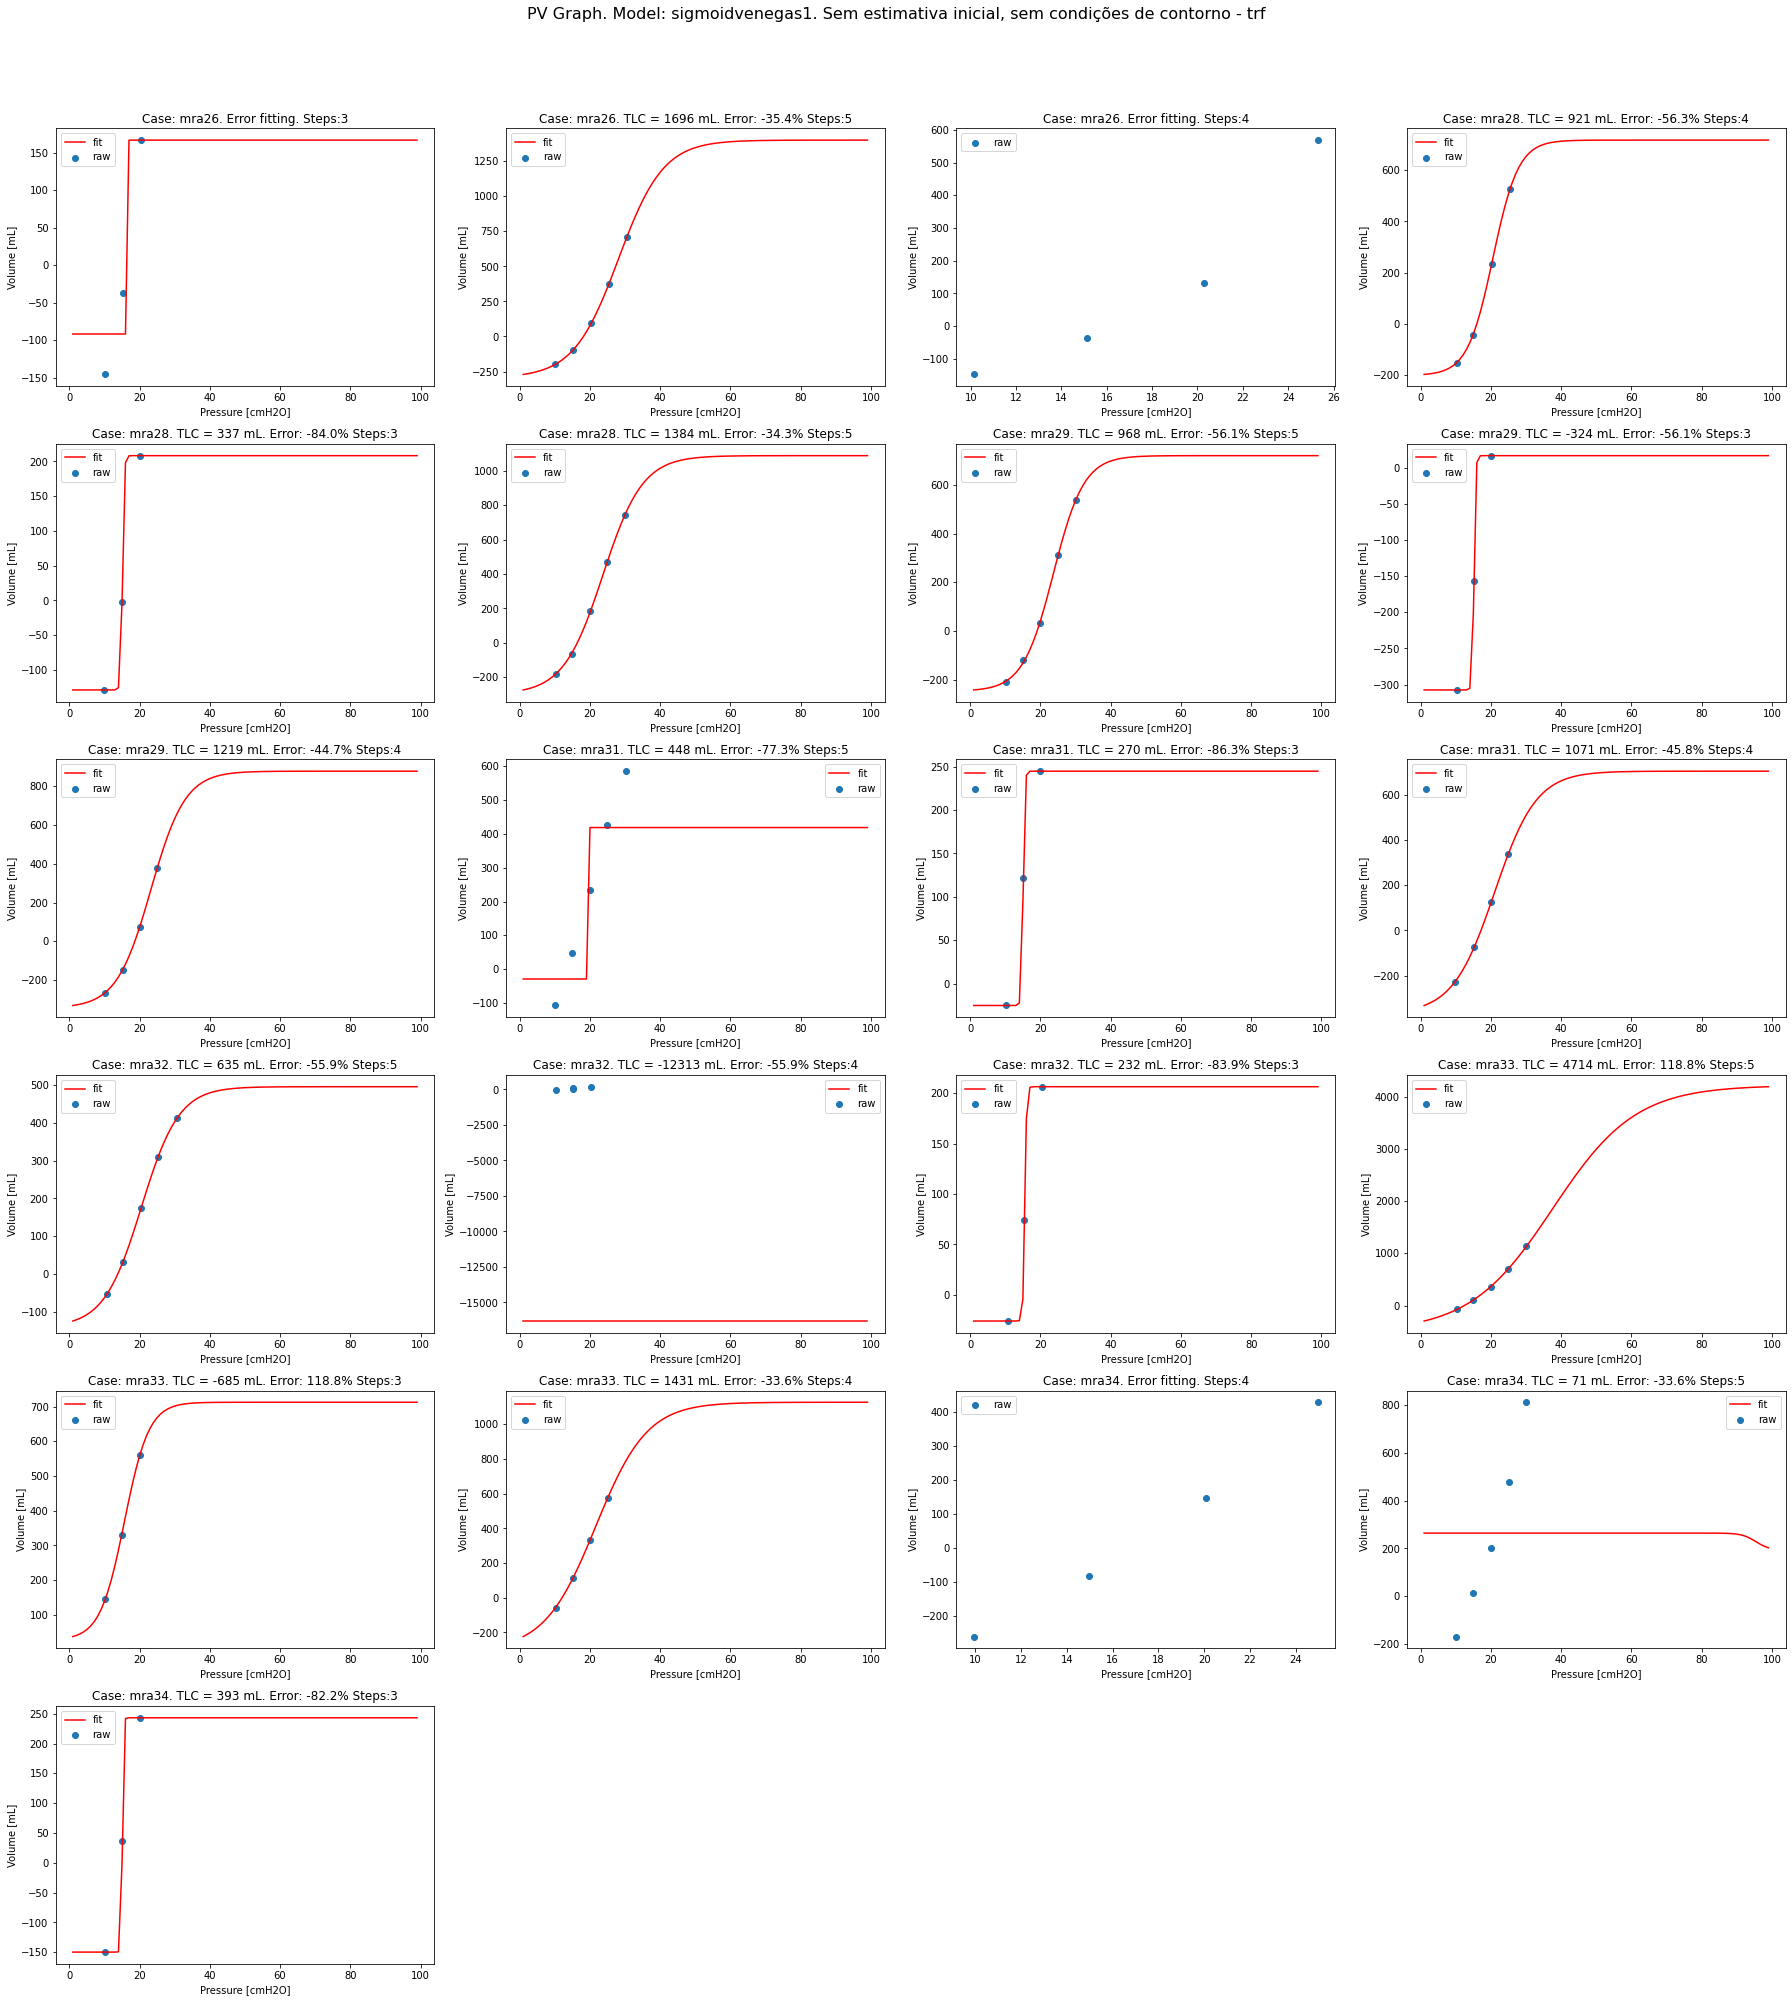

Norma(erro): 255.9. Erro médio: 63.89%. Ajustados: 14.


In [50]:
modelo = m.sigmoidvenegas1
metodo = 'trf'
texto = 'Sem estimativa inicial, sem condições de contorno - trf'
TLC_index = 1
dadosdf["Modelo"] = ""
dadosdf["Metodo"] = ""
dadosdf["Ajustado"] = ""
dadosdf["Erro"] = ""
_, _, _, df_final = m.testa_modelo(dadosdf, modelo, metodo=metodo, texto=texto, TLC_index=TLC_index, df_final=df_final)
df_resultados = pd.concat([df_resultados, dadosdf], ignore_index=True)

#### Modelo sigmoidpaivaoffset - Sem estimativa inicial, sem condições de contorno.
#### Método lm

	Caso 0 (mra26) deu erro... Steps:3
Testando caso 1: mra26: [   86.0 3682950.9 -348786.2   176.7 ]
	Caso 1 (mra26) deu erro... Steps:5
Testando caso 2: mra26: [   79.0 3150576.9 -311014.3   129.4 ]
	Caso 2 (mra26) deu erro... Steps:4
Testando caso 3: mra28: [   80.7 3513351.6 -347877.9   148.6 ]
	Caso 3 (mra28) deu erro... Steps:4
	Caso 4 (mra28) deu erro... Steps:3
Testando caso 5: mra28: [   87.7 3082385.9 -303667.7   234.9 ]
	Caso 5 (mra28) deu erro... Steps:5
Testando caso 6: mra29: [   74.7 4329881.6 -445714.6   115.0 ]
	Caso 6 (mra29) deu erro... Steps:5
	Caso 7 (mra29) deu erro... Steps:3
Testando caso 8: mra29: [    6.2 1235596.9 -115788.8     8.8 ]
	Caso 8 (mra29) deu erro... Steps:4
Testando caso 9: mra31: [   91.8 2101419.1 -211641.3   239.6 ]
	Caso 9 (mra31) deu erro... Steps:5
	Caso 10 (mra31) deu erro... Steps:3
Testando caso 11: mra31: [   59.8 2157709.7 -351325.8    34.7 ]
	Caso 11 (mra31) deu erro... Steps:4
Testando caso 12: mra32: [   91.5 4003524.4 -390318.3   179.1

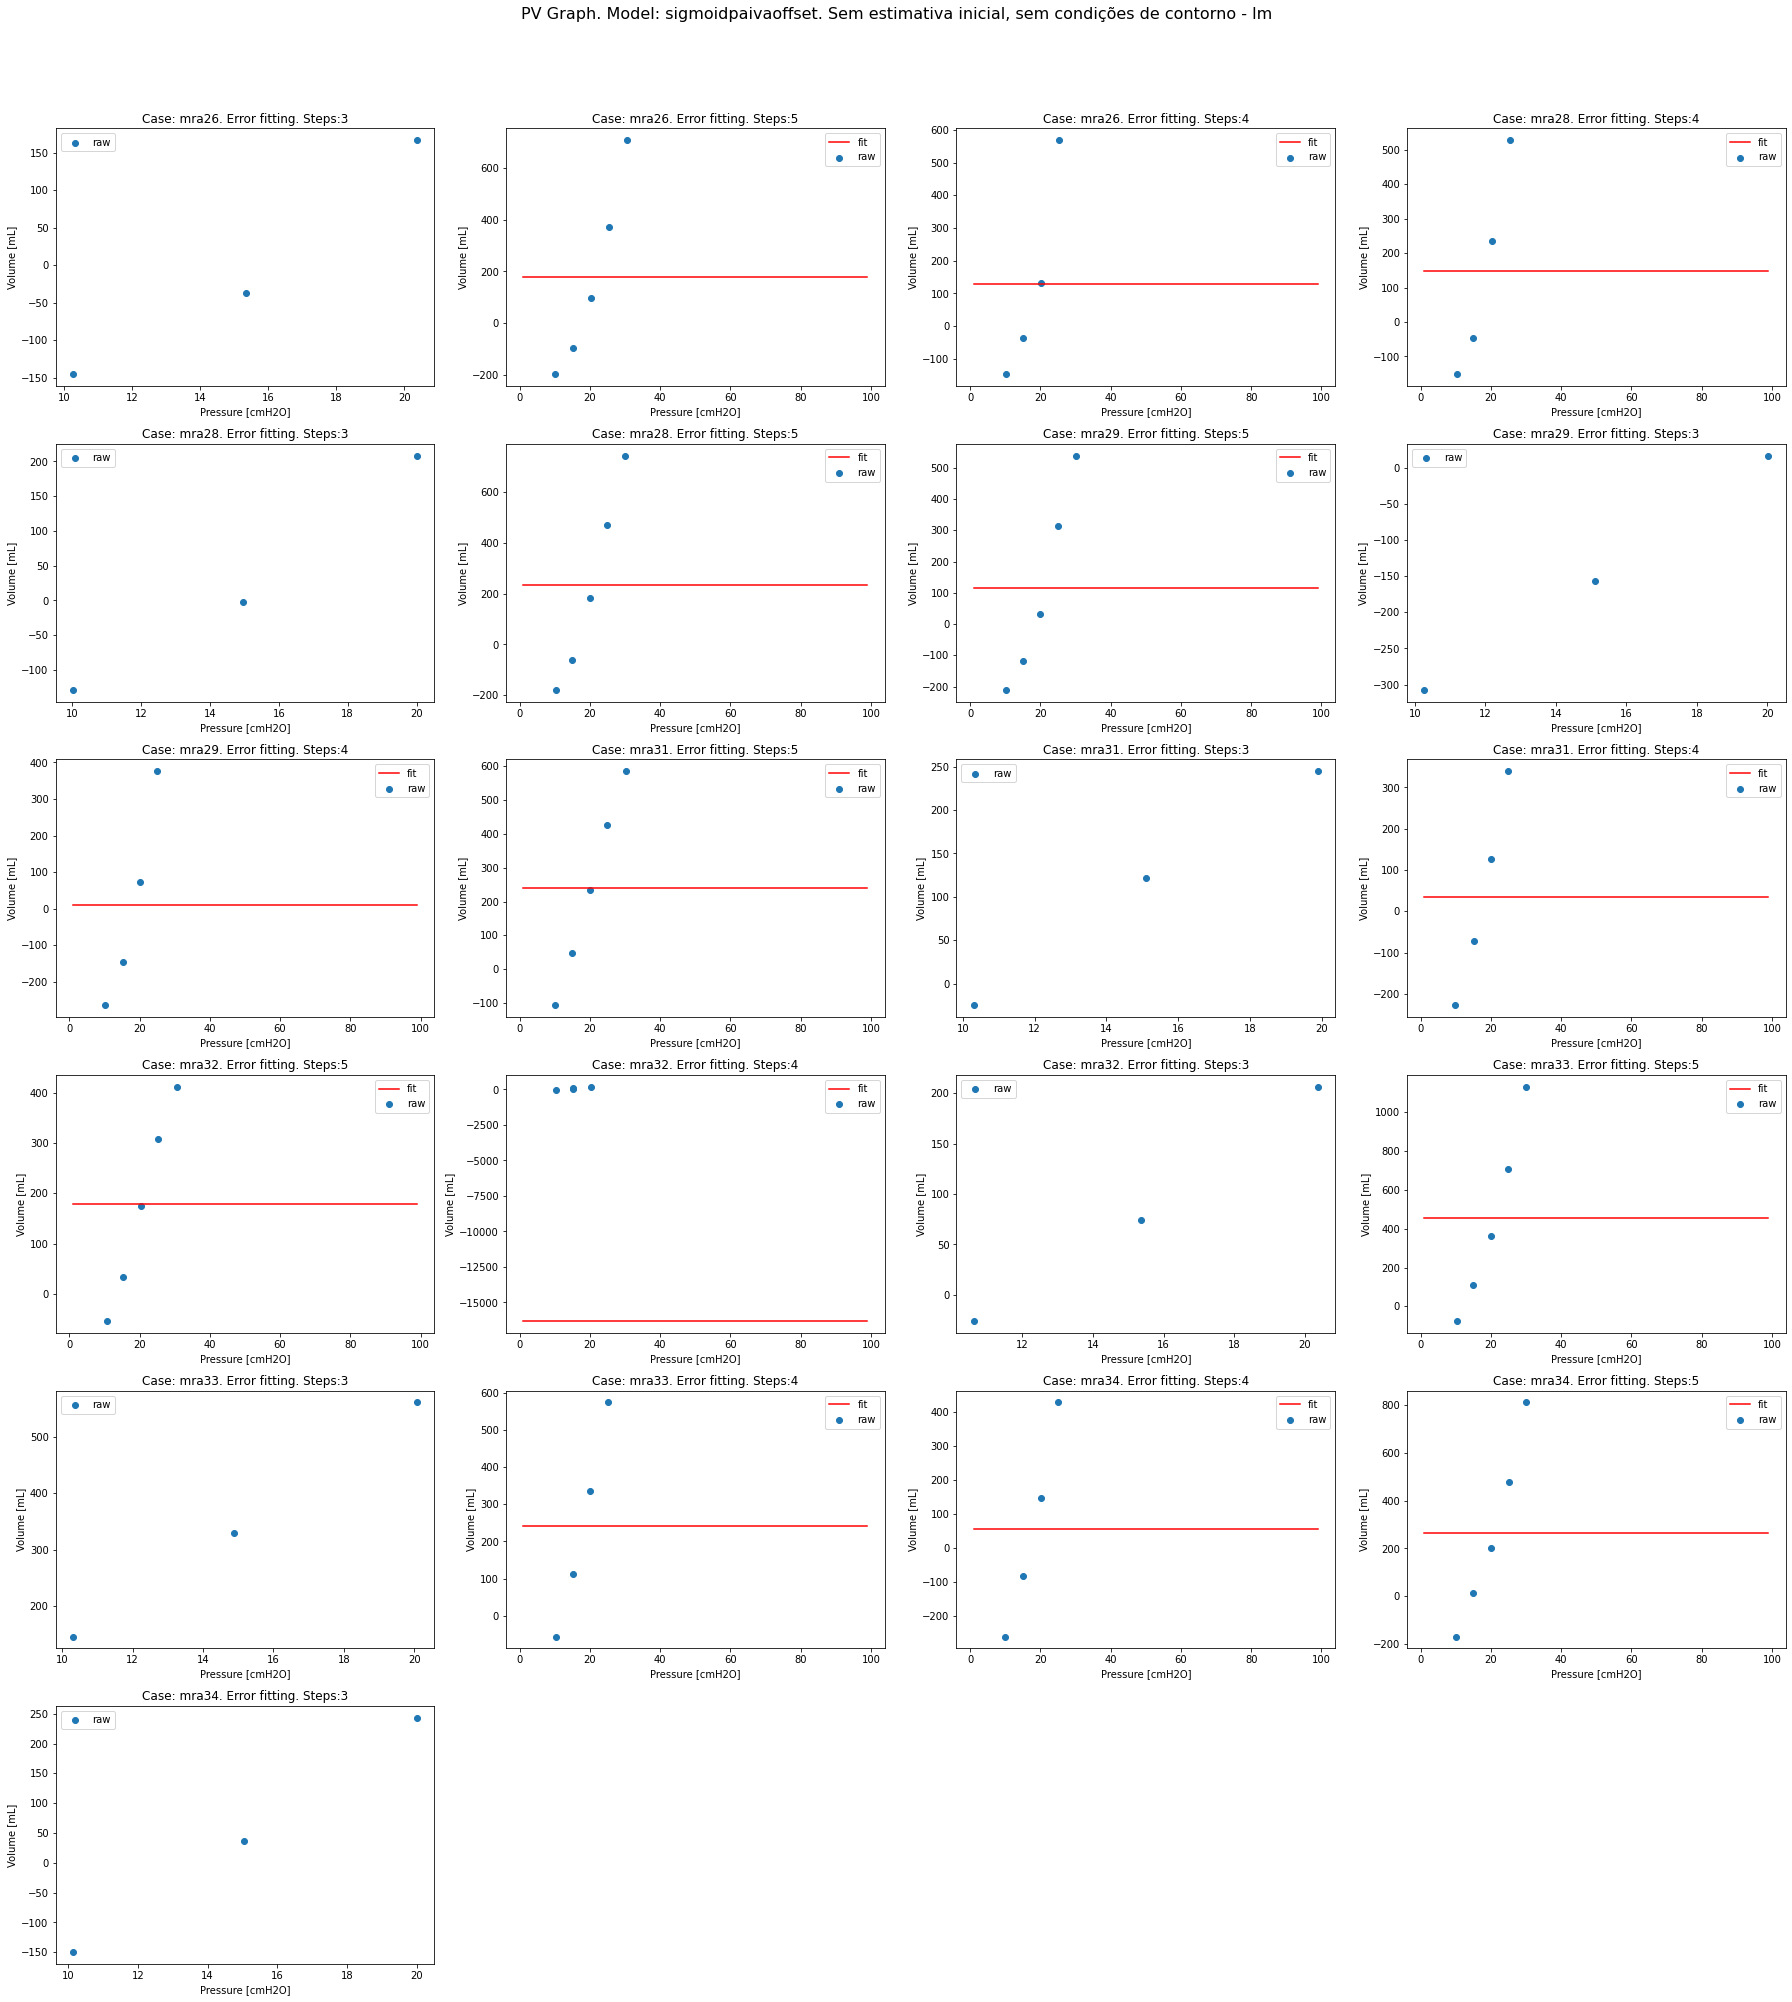

Norma(erro): -1.0. Erro médio: -1.00%. Ajustados: 0.


In [51]:
modelo = m.sigmoidpaivaoffset
metodo = 'lm'
texto = 'Sem estimativa inicial, sem condições de contorno - lm'
TLC_index = 0
dadosdf["Modelo"] = ""
dadosdf["Metodo"] = ""
dadosdf["Ajustado"] = ""
dadosdf["Erro"] = ""
_, _, _, df_final = m.testa_modelo(dadosdf, modelo, metodo=metodo, texto=texto, TLC_index=TLC_index, df_final=df_final)
df_resultados = pd.concat([df_resultados, dadosdf], ignore_index=True)

#### Modelo sigmoidpaivaoffset - Sem estimativa inicial, sem condições de contorno.
#### Método dogbox

	Caso 0 (mra26) deu erro... Steps:3
Testando caso 1: mra26: [   84.3     1.0     4.0    92.4 ]
	Caso 1 (mra26) deu erro... Steps:5
	Caso 2 (mra26) deu erro... Steps:4
	Caso 3 (mra28) deu erro... Steps:4
	Caso 4 (mra28) deu erro... Steps:3
	Caso 5 (mra28) deu erro... Steps:5
	Caso 6 (mra29) deu erro... Steps:5
Testando caso 7: mra29: [  -30.0    -3.2    -1.6  -148.7 ]
	Caso 7 (mra29) deu erro... Steps:3
	Caso 8 (mra29) deu erro... Steps:4
	Caso 9 (mra31) deu erro... Steps:5
	Caso 10 (mra31) deu erro... Steps:3
	Caso 11 (mra31) deu erro... Steps:4
	Caso 12 (mra32) deu erro... Steps:5
Testando caso 13: mra32: [  -61.9     2.6   -19.0 -16310.6 ]
	Caso 13 (mra32) deu erro... Steps:4
	Caso 14 (mra32) deu erro... Steps:3
	Caso 15 (mra33) deu erro... Steps:5
	Caso 16 (mra33) deu erro... Steps:3
	Caso 17 (mra33) deu erro... Steps:4
	Caso 18 (mra34) deu erro... Steps:4
	Caso 19 (mra34) deu erro... Steps:5
	Caso 20 (mra34) deu erro... Steps:3


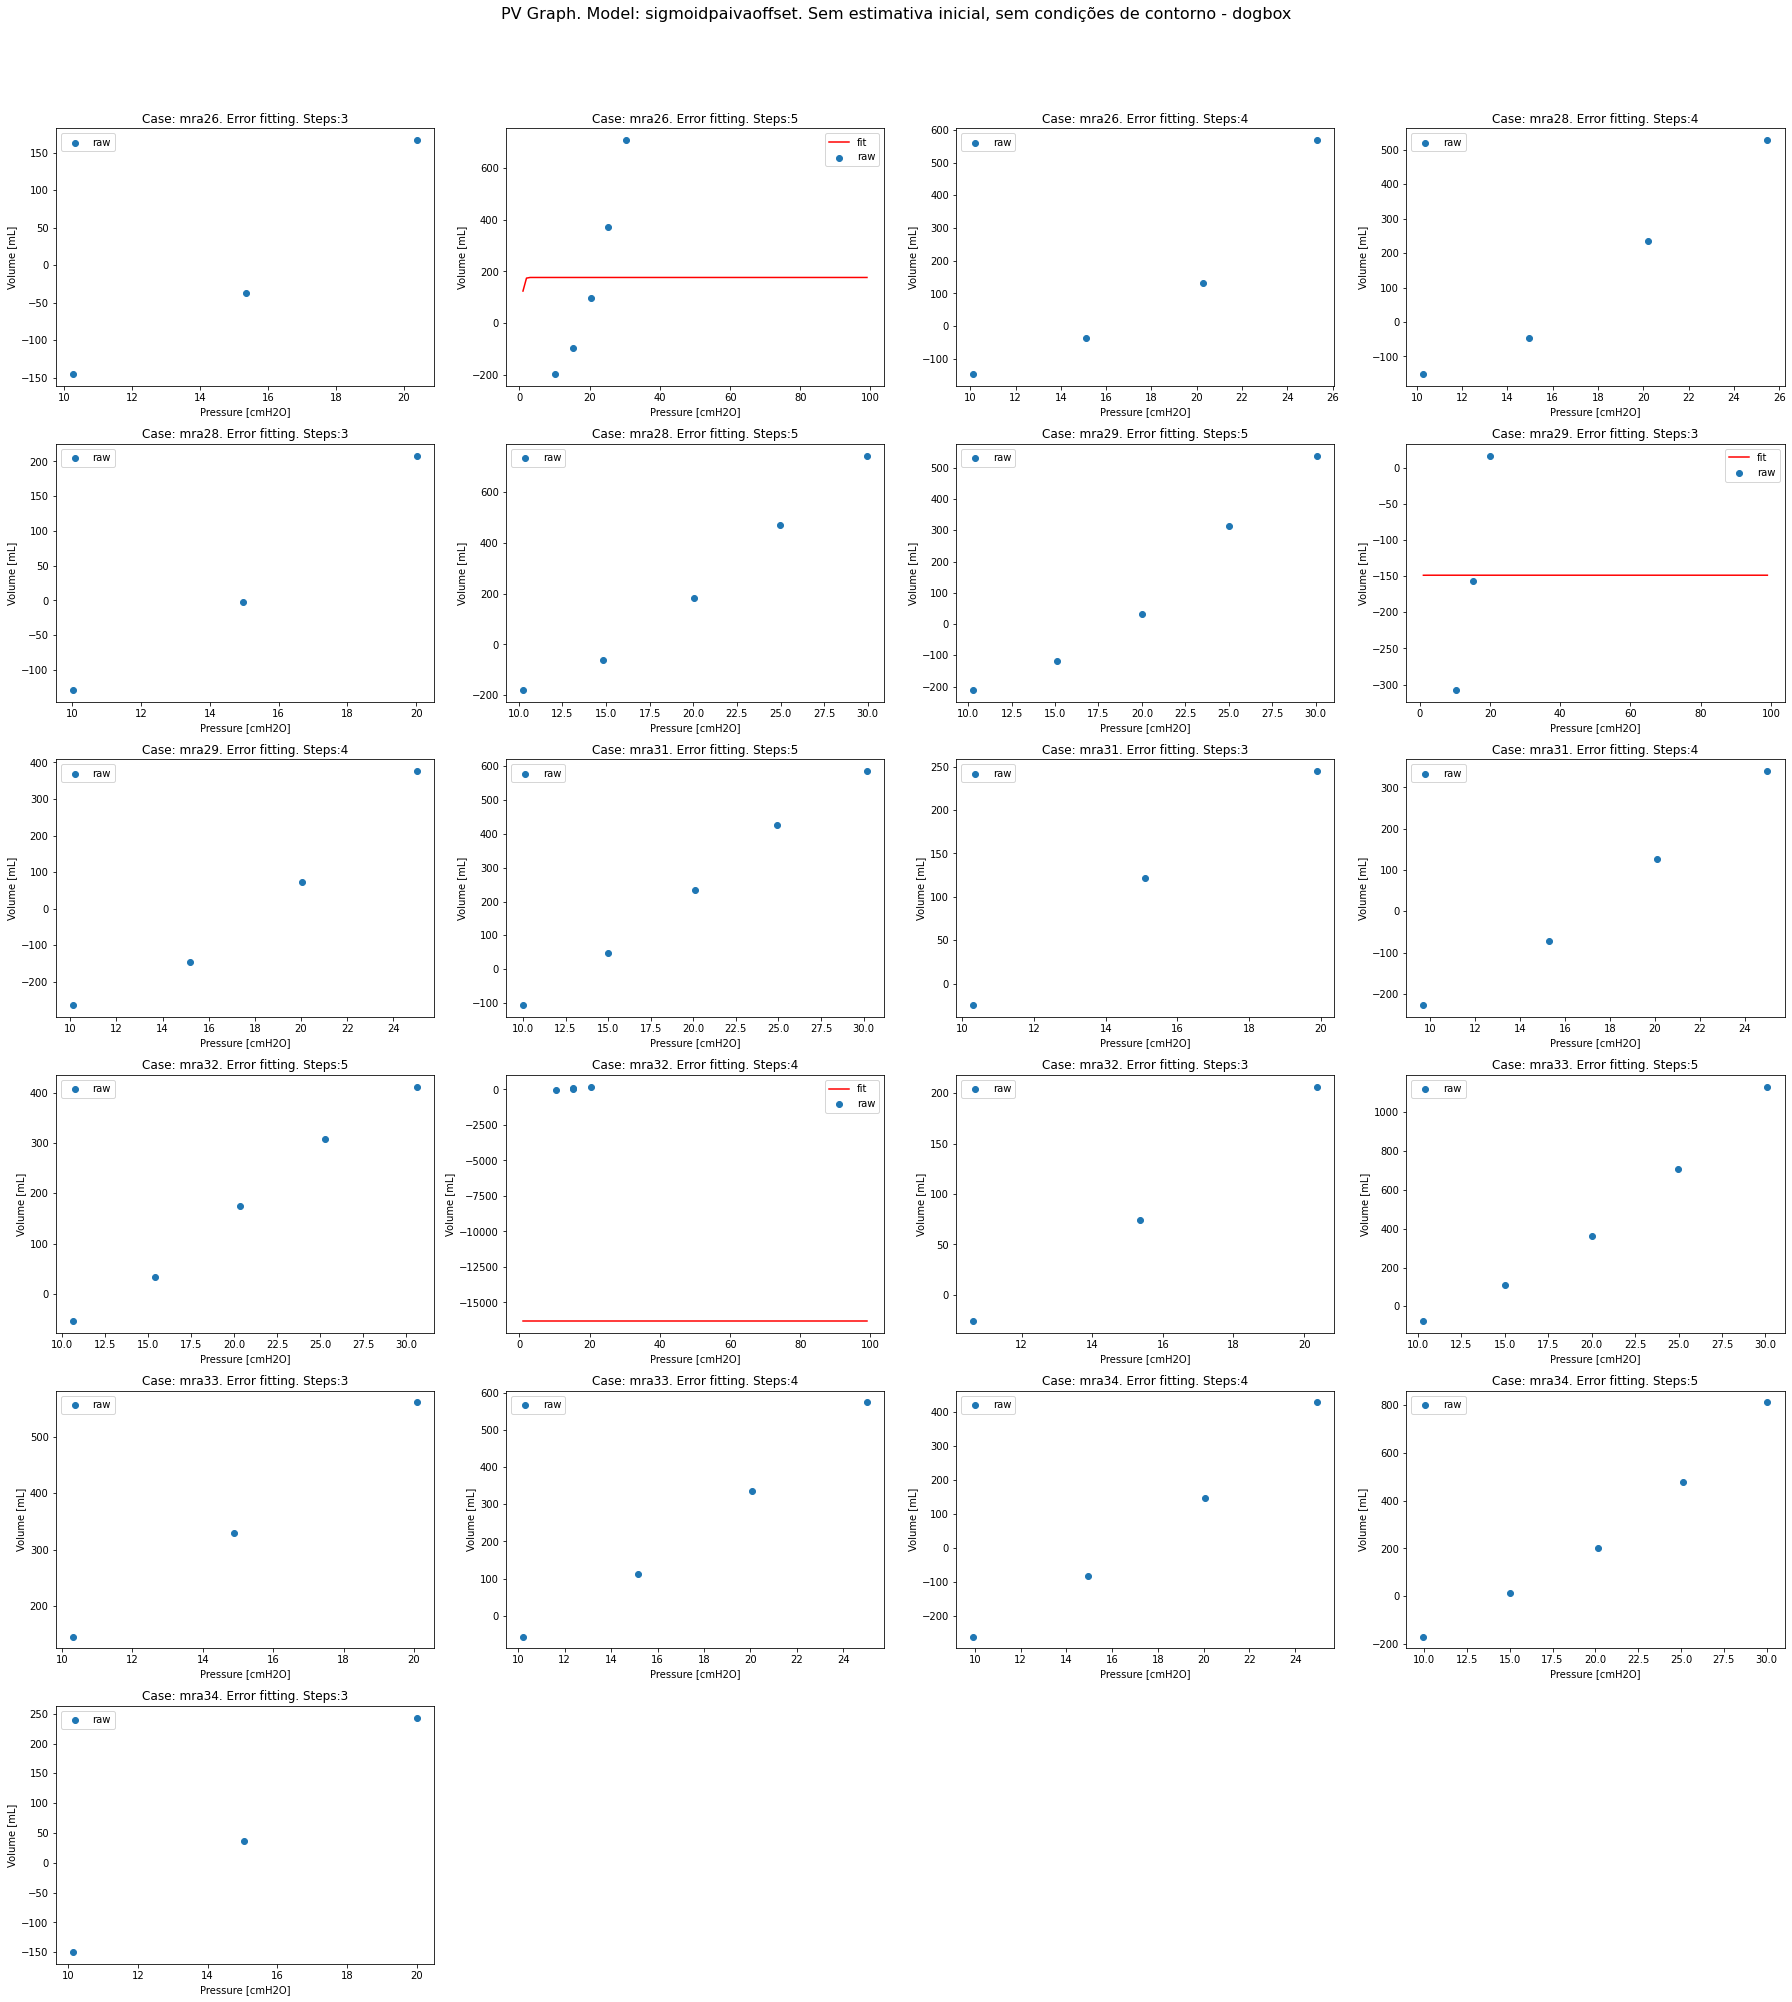

Norma(erro): -1.0. Erro médio: -1.00%. Ajustados: 0.


In [52]:
modelo = m.sigmoidpaivaoffset
metodo = 'dogbox'
texto = 'Sem estimativa inicial, sem condições de contorno - dogbox'
TLC_index = 0
dadosdf["Modelo"] = ""
dadosdf["Metodo"] = ""
dadosdf["Ajustado"] = ""
dadosdf["Erro"] = ""
_, _, _, df_final = m.testa_modelo(dadosdf, modelo, metodo=metodo, texto=texto, TLC_index=TLC_index, df_final=df_final)
df_resultados = pd.concat([df_resultados, dadosdf], ignore_index=True)

#### Modelo sigmoidpaivaoffset - Sem estimativa inicial, sem condições de contorno.
#### Método trf

Testando caso 0: mra26: [   -3.3     1.4    -3.3    -5.7 ]
	Caso 0 (mra26) deu erro... Steps:3
	Caso 1 (mra26) deu erro... Steps:5
	Caso 2 (mra26) deu erro... Steps:4
	Caso 3 (mra28) deu erro... Steps:4
	Caso 4 (mra28) deu erro... Steps:3
	Caso 5 (mra28) deu erro... Steps:5
	Caso 6 (mra29) deu erro... Steps:5
	Caso 7 (mra29) deu erro... Steps:3
	Caso 8 (mra29) deu erro... Steps:4
Testando caso 9: mra31: [   44.7 -0.588    -3.2   239.6 ]
	Caso 9 (mra31) deu erro... Steps:5
	Caso 10 (mra31) deu erro... Steps:3
	Caso 11 (mra31) deu erro... Steps:4
Testando caso 12: mra32: [   44.8    12.4  -127.9   179.1 ]
	Caso 12 (mra32) deu erro... Steps:5
	Caso 13 (mra32) deu erro... Steps:4
	Caso 14 (mra32) deu erro... Steps:3
	Caso 15 (mra33) deu erro... Steps:5
Testando caso 16: mra33: [  443.7    87.3 0.689   133.2 ]
Testando caso 17: mra33: [   44.8     8.3  -103.0   242.1 ]
	Caso 18 (mra34) deu erro... Steps:4
	Caso 19 (mra34) deu erro... Steps:5
	Caso 20 (mra34) deu erro... Steps:3


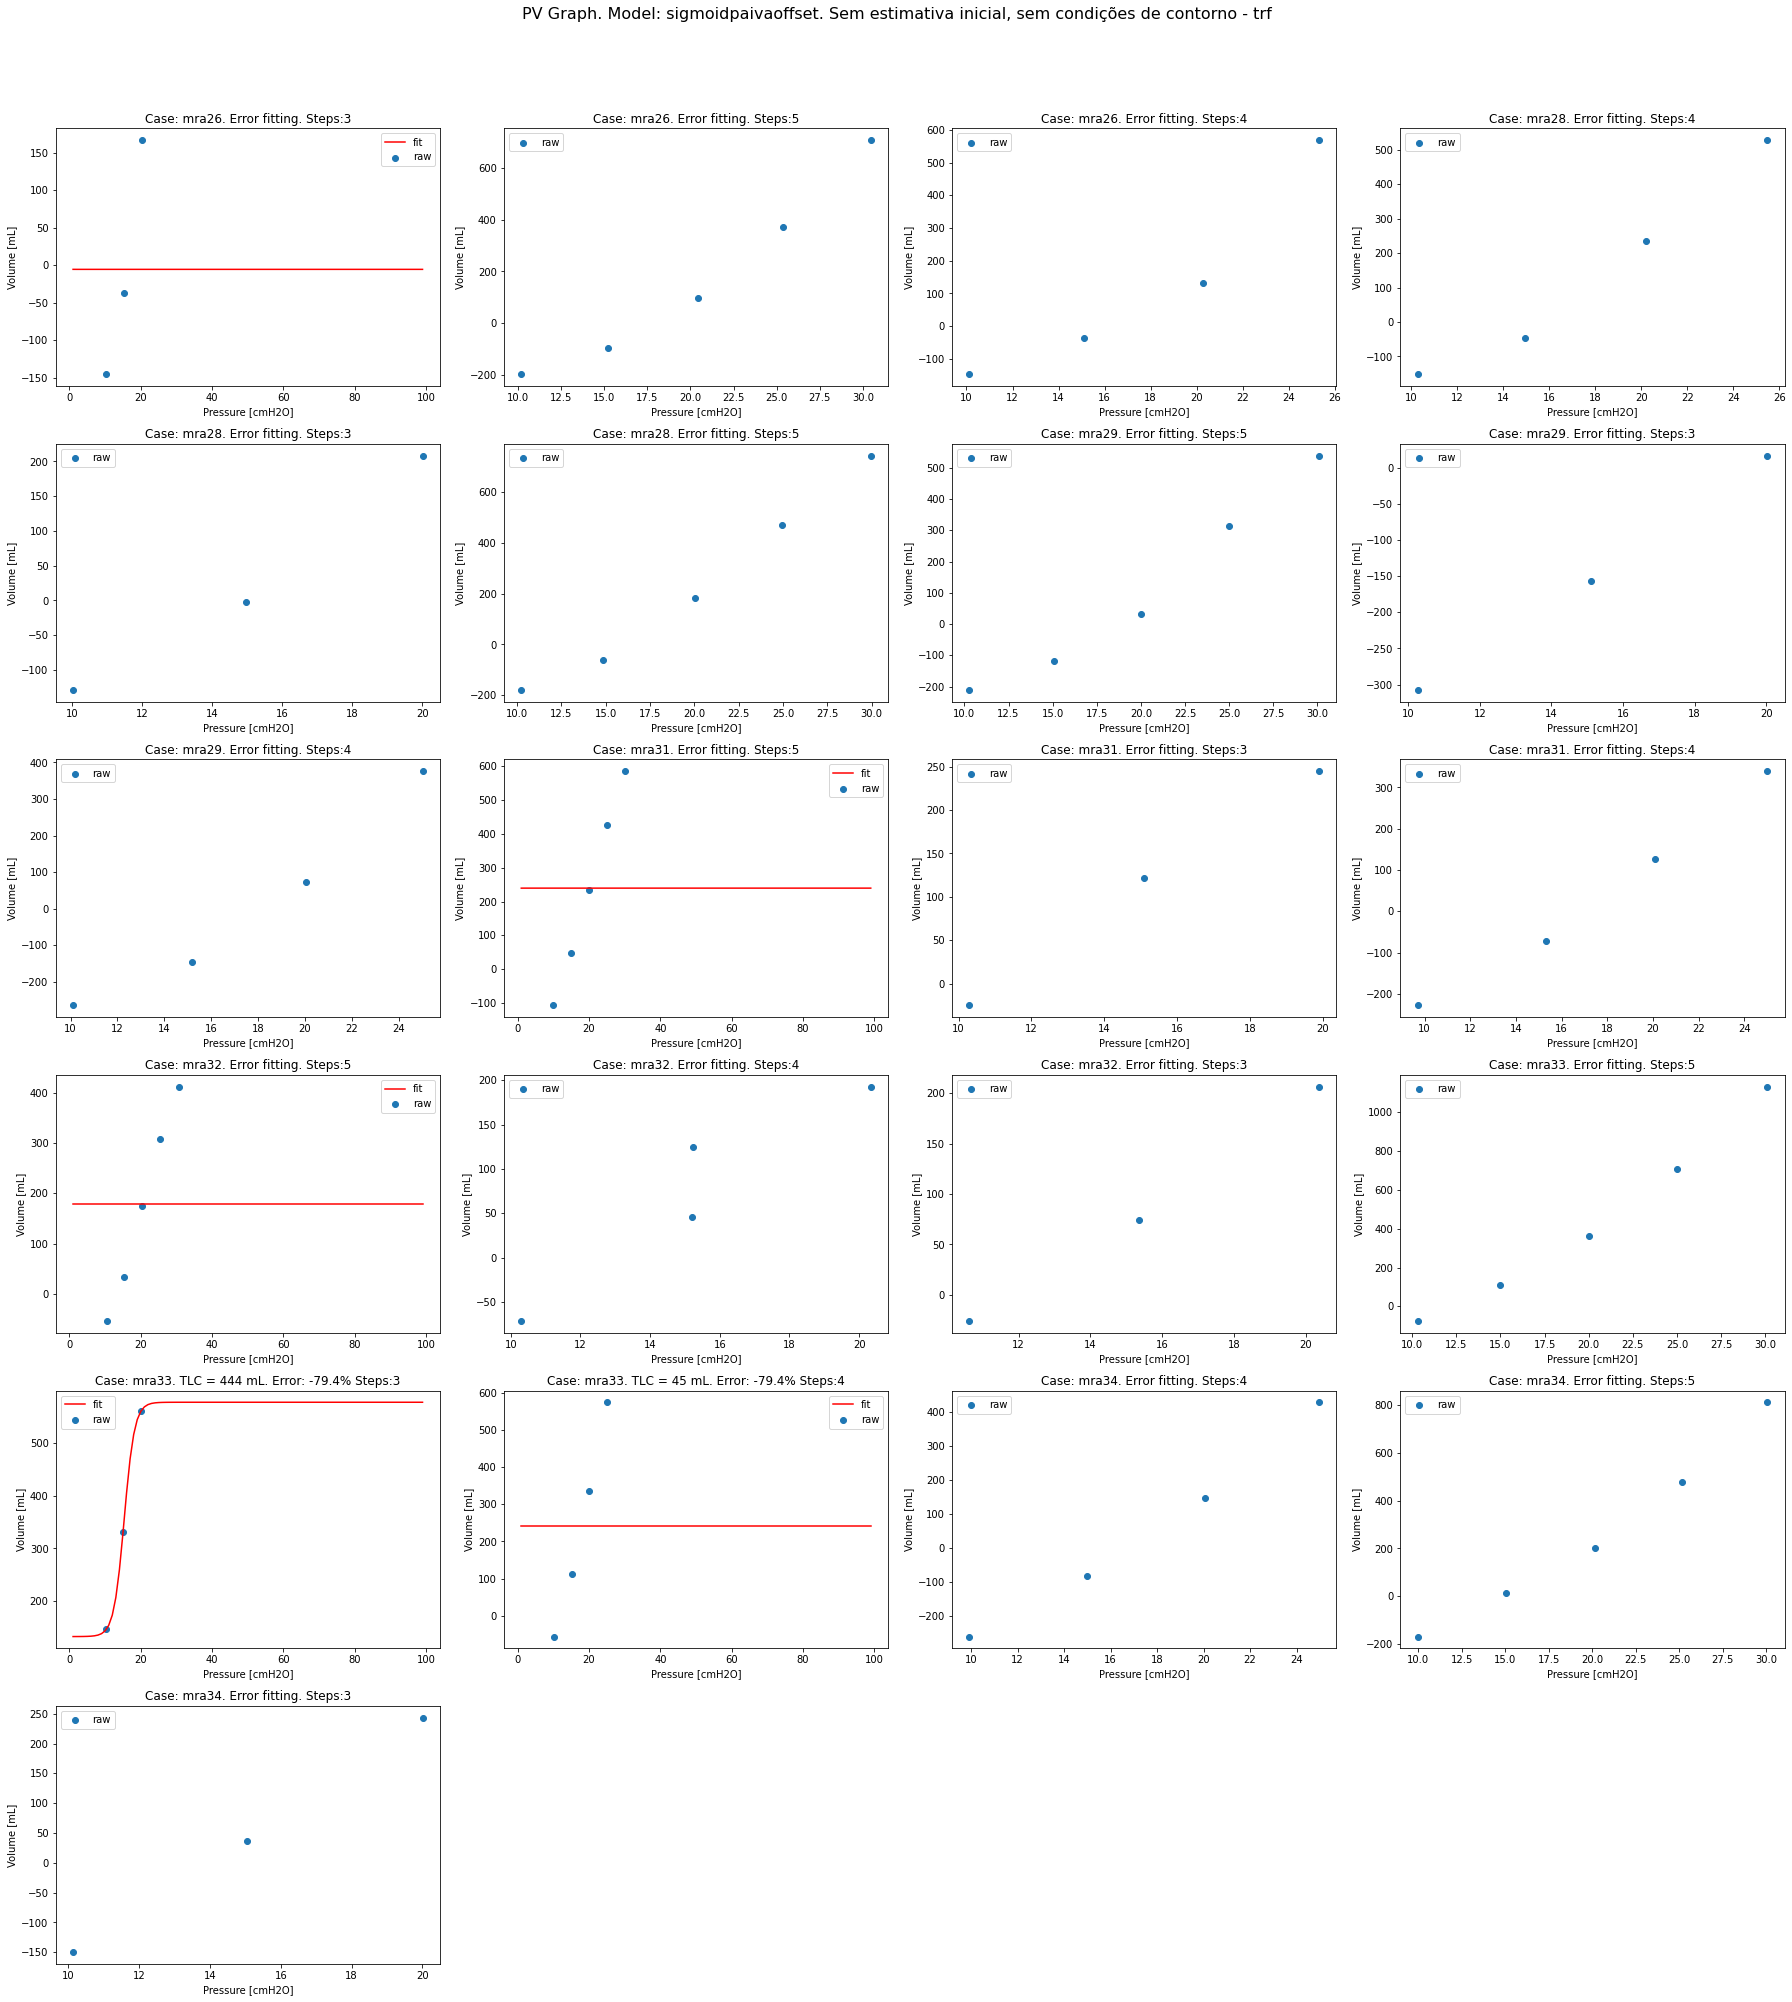

Norma(erro): 79.4. Erro médio: 79.41%. Ajustados: 1.


In [53]:
modelo = m.sigmoidpaivaoffset
metodo = 'trf'
texto = 'Sem estimativa inicial, sem condições de contorno - trf'
TLC_index = 0
dadosdf["Modelo"] = ""
dadosdf["Metodo"] = ""
dadosdf["Ajustado"] = ""
dadosdf["Erro"] = ""
_, _, _, df_final = m.testa_modelo(dadosdf, modelo, metodo=metodo, texto=texto, TLC_index=TLC_index, df_final=df_final)
df_resultados = pd.concat([df_resultados, dadosdf], ignore_index=True)

#### Modelo sigmoidvenegas2offset - Sem estimativa inicial, sem condições de contorno.
#### Método lm

	Caso 0 (mra26) deu erro... Steps:3
	Caso 1 (mra26) deu erro... Steps:5
	Caso 2 (mra26) deu erro... Steps:4
	Caso 3 (mra28) deu erro... Steps:4
	Caso 4 (mra28) deu erro... Steps:3
	Caso 5 (mra28) deu erro... Steps:5
	Caso 6 (mra29) deu erro... Steps:5
	Caso 7 (mra29) deu erro... Steps:3
	Caso 8 (mra29) deu erro... Steps:4
	Caso 9 (mra31) deu erro... Steps:5
	Caso 10 (mra31) deu erro... Steps:3
	Caso 11 (mra31) deu erro... Steps:4
	Caso 12 (mra32) deu erro... Steps:5
	Caso 13 (mra32) deu erro... Steps:4
	Caso 14 (mra32) deu erro... Steps:3
	Caso 15 (mra33) deu erro... Steps:5
	Caso 16 (mra33) deu erro... Steps:3
	Caso 17 (mra33) deu erro... Steps:4
	Caso 18 (mra34) deu erro... Steps:4
	Caso 19 (mra34) deu erro... Steps:5
	Caso 20 (mra34) deu erro... Steps:3


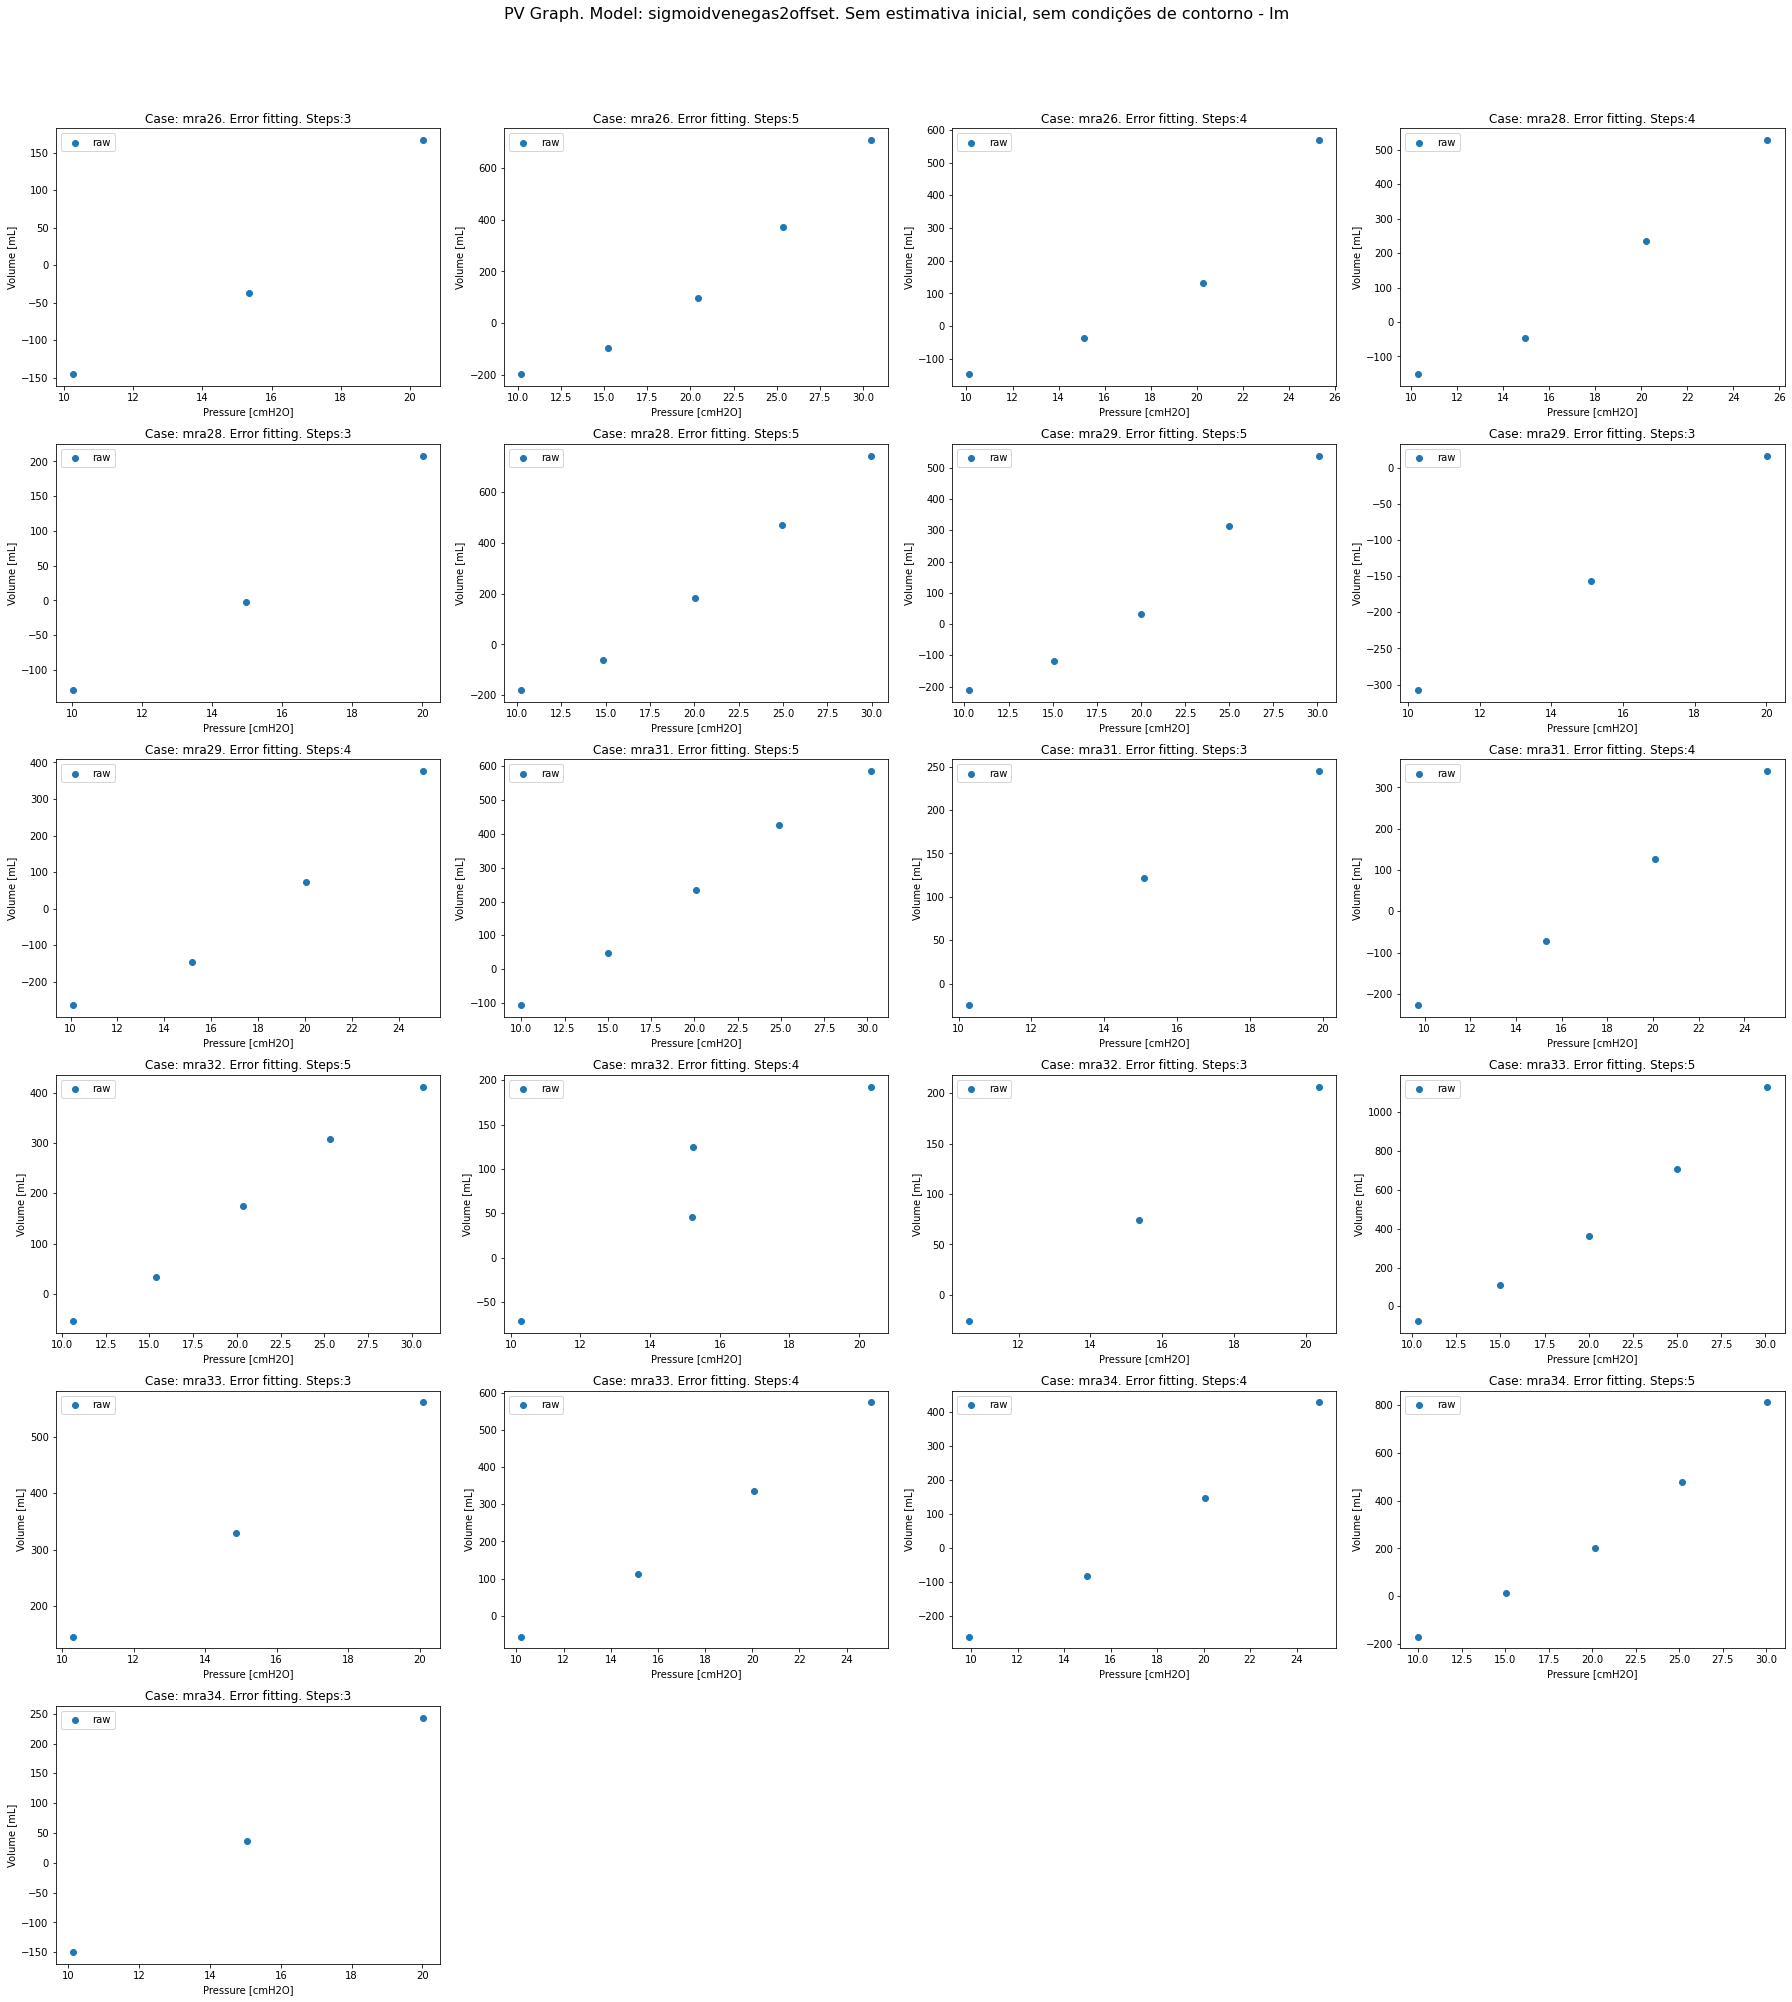

Norma(erro): -1.0. Erro médio: -1.00%. Ajustados: 0.


In [54]:
modelo = m.sigmoidvenegas2offset
metodo = 'lm'
texto = 'Sem estimativa inicial, sem condições de contorno - lm'
TLC_index = 0
dadosdf["Modelo"] = ""
dadosdf["Metodo"] = ""
dadosdf["Ajustado"] = ""
dadosdf["Erro"] = ""
_, _, _, df_final = m.testa_modelo(dadosdf, modelo, metodo=metodo, texto=texto, TLC_index=TLC_index, df_final=df_final)
df_resultados = pd.concat([df_resultados, dadosdf], ignore_index=True)

#### Modelo sigmoidvenegas2offset - Sem estimativa inicial, sem condições de contorno.
#### Método dogbox

Testando caso 0: mra26: [   -2.6     1.2     1.9     2.0 0.201    -3.1 ]
	Caso 0 (mra26) deu erro... Steps:3
Testando caso 1: mra26: [ 1695.6 0.556     4.9    28.1     6.4  -294.7 ]
Testando caso 2: mra26: [  659.4     2.0     1.0    20.4 0.151   -90.9 ]
	Caso 3 (mra28) deu erro... Steps:4
Testando caso 4: mra28: [  337.3 0.535     2.6    15.2 0.277  -128.9 ]
	Caso 5 (mra28) deu erro... Steps:5
	Caso 6 (mra29) deu erro... Steps:5
	Caso 7 (mra29) deu erro... Steps:3
Testando caso 8: mra29: [ 1219.1     4.6     4.6    23.2     4.9  -342.9 ]
Testando caso 9: mra31: [  448.3     1.4     2.0    16.2 0.023   -29.3 ]
Testando caso 10: mra31: [  269.7 0.898     5.1    15.1 0.156   -25.0 ]
Testando caso 11: mra31: [ 1070.9 0.799     3.0    21.0     6.0  -367.2 ]
Testando caso 12: mra32: [  634.8   -53.0    31.4    20.6     5.3  -139.8 ]
	Caso 13 (mra32) deu erro... Steps:4
Testando caso 14: mra32: [  232.2 0.380     3.1    15.5 0.157   -25.9 ]
Testando caso 15: mra33: [ 4714.3     7.4     2.4  

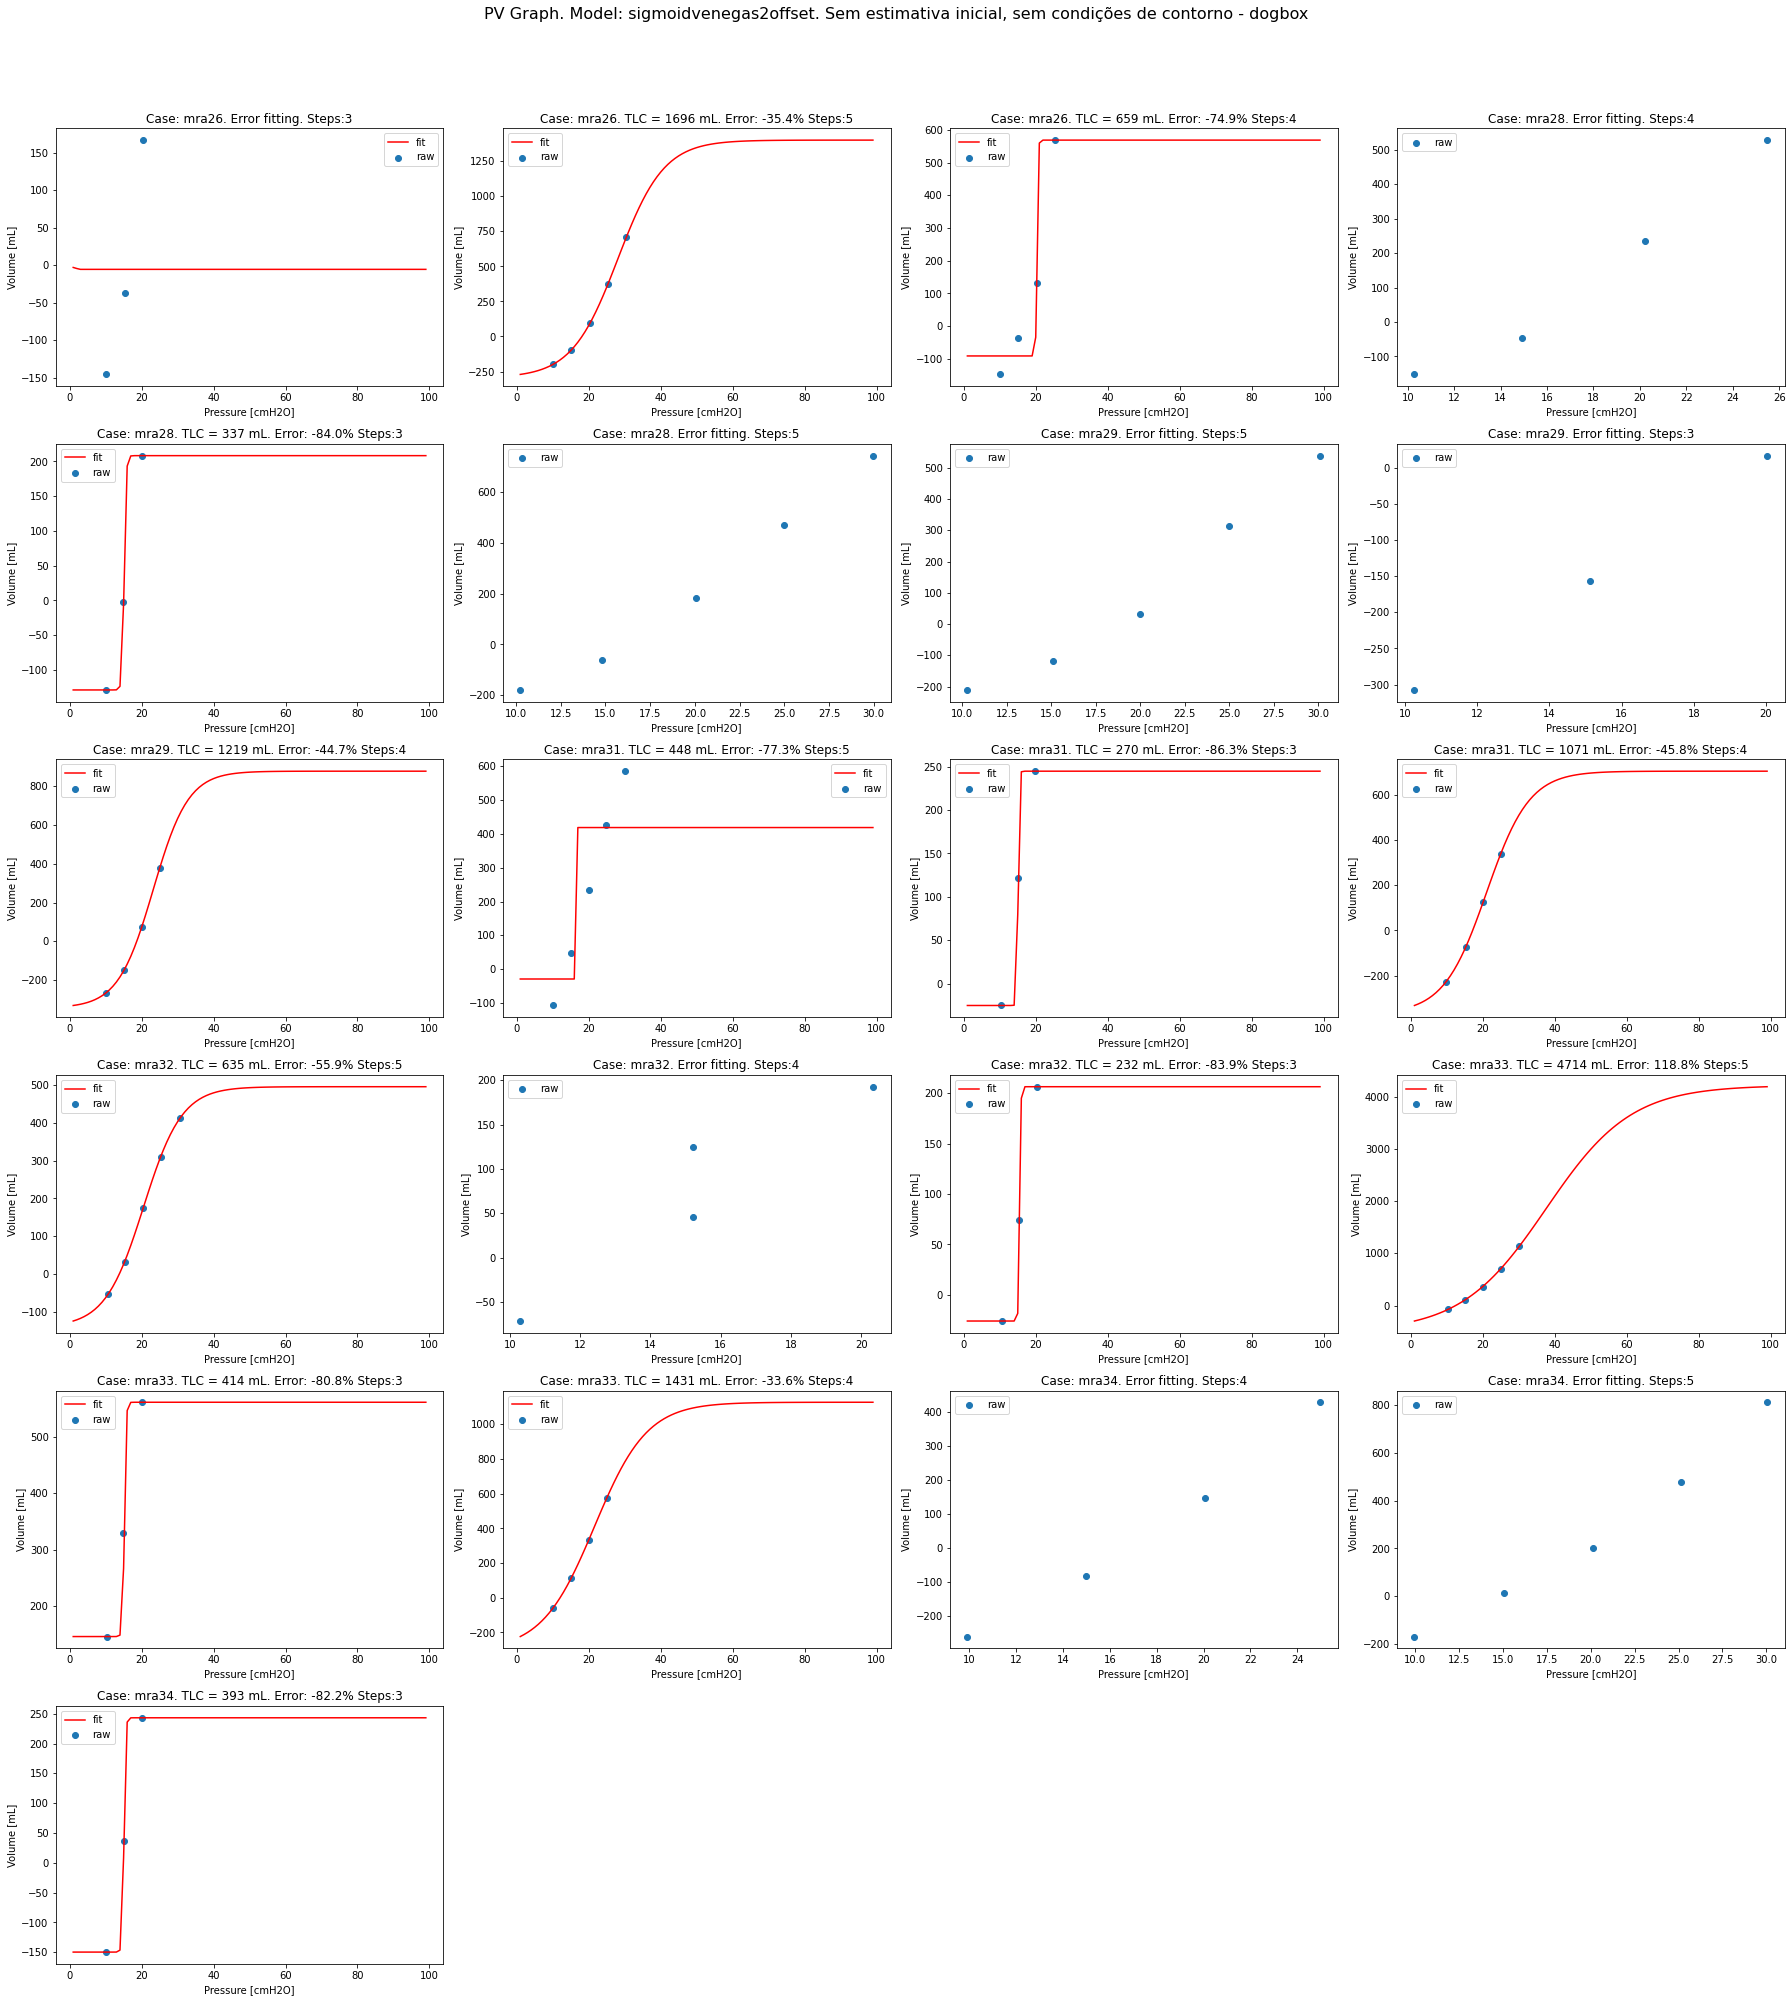

Norma(erro): 264.8. Erro médio: 69.50%. Ajustados: 13.


In [55]:
modelo = m.sigmoidvenegas2offset
metodo = 'dogbox'
texto = 'Sem estimativa inicial, sem condições de contorno - dogbox'
TLC_index = 0
dadosdf["Modelo"] = ""
dadosdf["Metodo"] = ""
dadosdf["Ajustado"] = ""
dadosdf["Erro"] = ""
_, _, _, df_final = m.testa_modelo(dadosdf, modelo, metodo=metodo, texto=texto, TLC_index=TLC_index, df_final=df_final)
df_resultados = pd.concat([df_resultados, dadosdf], ignore_index=True)

#### Modelo sigmoidvenegas2offset - Sem estimativa inicial, sem condições de contorno.
#### Método trf

	Caso 0 (mra26) deu erro... Steps:3
Testando caso 1: mra26: [  608.2     1.0 0.909    21.3 0.009   -66.6 ]
Testando caso 2: mra26: [  440.5   -57.2    79.3    16.8 0.056   -90.9 ]
Testando caso 3: mra28: [  921.0     1.0 0.855    20.6     3.6  -202.9 ]
Testando caso 4: mra28: [  337.3     1.1 0.626    15.1 0.263  -128.9 ]
Testando caso 5: mra28: [ 1384.2 -8817.5   267.6    23.7     5.6  -297.5 ]
	Caso 6 (mra29) deu erro... Steps:5
	Caso 7 (mra29) deu erro... Steps:3
	Caso 8 (mra29) deu erro... Steps:4
	Caso 9 (mra31) deu erro... Steps:5
Testando caso 10: mra31: [  269.7     1.0 0.916    15.1 0.235   -25.0 ]
Testando caso 11: mra31: [ 1070.9 0.898     8.8    21.0     6.0  -367.2 ]
Testando caso 12: mra32: [  634.8  -369.0   454.3    20.6     5.3  -139.8 ]
Testando caso 13: mra32: [21914.6     1.0     1.8    14.7 0.000 -21789.2 ]
Testando caso 14: mra32: [  232.2     1.1     1.2    15.5 0.222   -25.9 ]
Testando caso 15: mra33: [ 4714.3  1466.9    42.6    37.6    11.8  -498.8 ]
	Caso 16 (

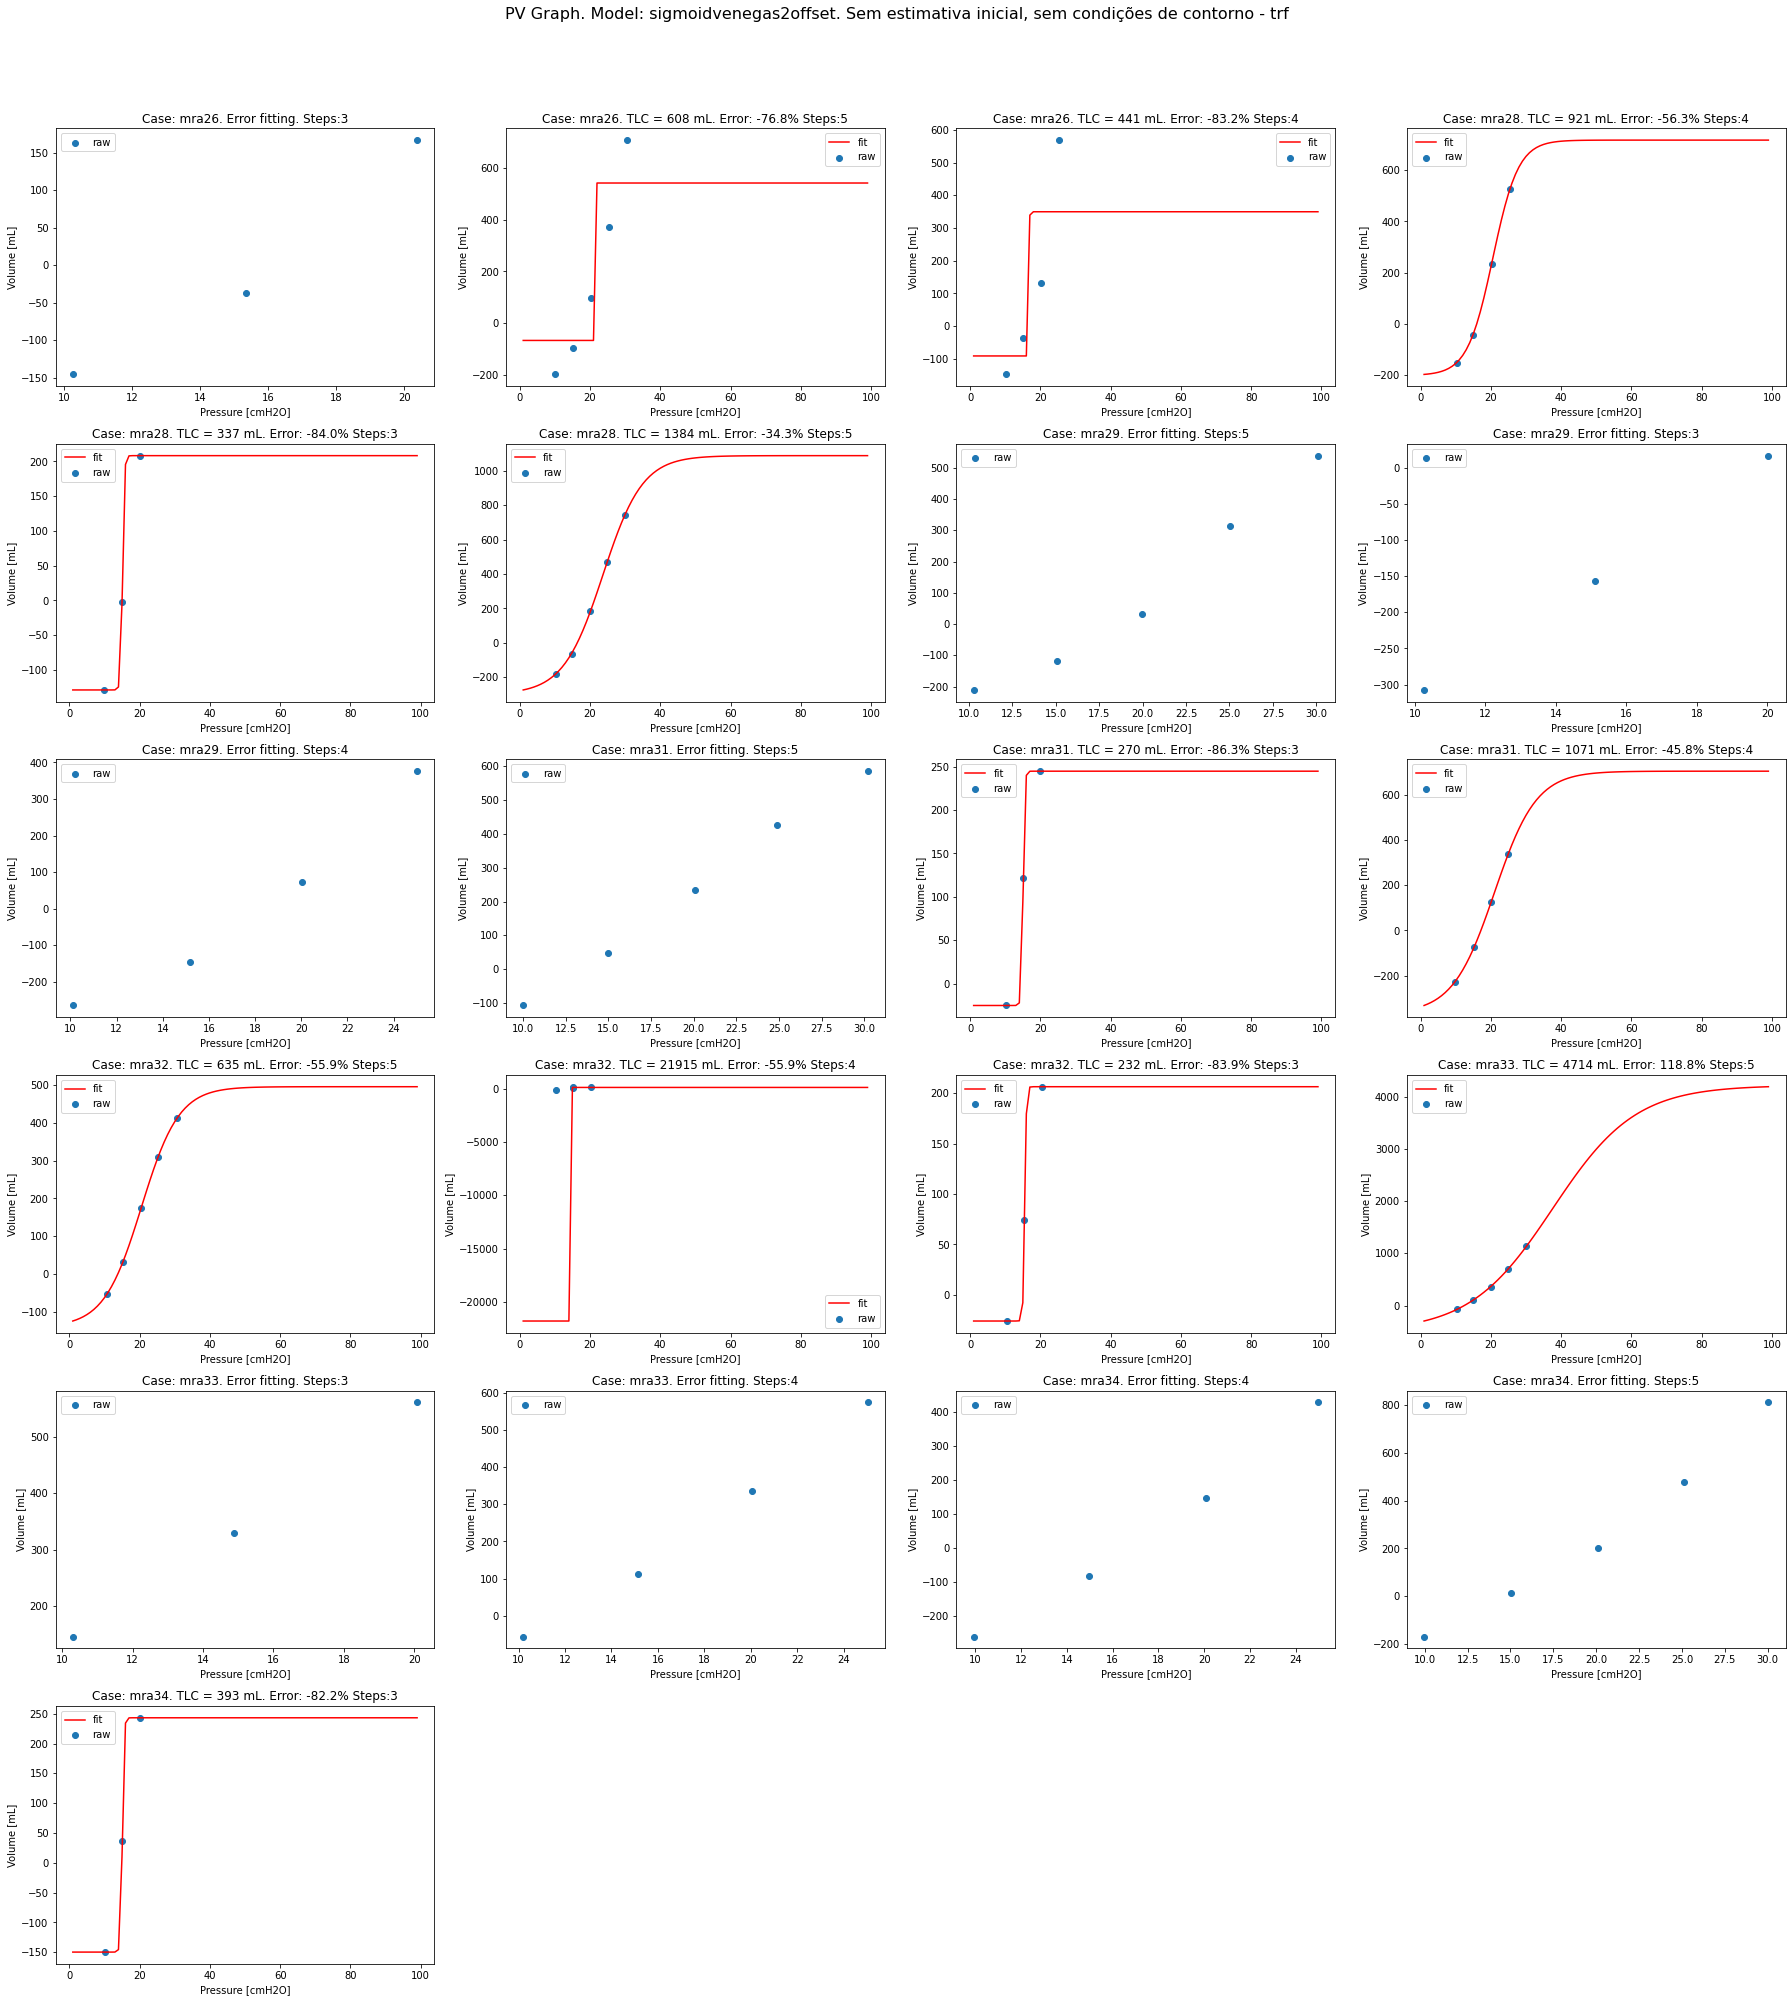

Norma(erro): 254.6. Erro médio: 73.41%. Ajustados: 11.


In [56]:
modelo = m.sigmoidvenegas2offset
metodo = 'trf'
texto = 'Sem estimativa inicial, sem condições de contorno - trf'
TLC_index = 0
dadosdf["Modelo"] = ""
dadosdf["Metodo"] = ""
dadosdf["Ajustado"] = ""
dadosdf["Erro"] = ""
_, _, _, df_final = m.testa_modelo(dadosdf, modelo, metodo=metodo, texto=texto, TLC_index=TLC_index, df_final=df_final)
df_resultados = pd.concat([df_resultados, dadosdf], ignore_index=True)

#### Modelo sigmoidmurphy - Sem estimativa inicial, sem condições de contorno.
#### Método lm

	Caso 0 (mra26) deu erro... Steps:3
	Caso 1 (mra26) deu erro... Steps:5
	Caso 2 (mra26) deu erro... Steps:4
	Caso 3 (mra28) deu erro... Steps:4
	Caso 4 (mra28) deu erro... Steps:3
Testando caso 5: mra28: [-1864.0 528879.9 90222.0 -2967.2    64.2 ]
	Caso 5 (mra28) deu erro... Steps:5
Testando caso 6: mra29: [  630.7  -571.3   404.9  8497.1    33.4 ]
	Caso 7 (mra29) deu erro... Steps:3
	Caso 8 (mra29) deu erro... Steps:4
	Caso 9 (mra31) deu erro... Steps:5
	Caso 10 (mra31) deu erro... Steps:3
	Caso 11 (mra31) deu erro... Steps:4
	Caso 12 (mra32) deu erro... Steps:5
	Caso 13 (mra32) deu erro... Steps:4
	Caso 14 (mra32) deu erro... Steps:3
Testando caso 15: mra33: [  719.1  8513.2 -0.000 983648.8  -102.5 ]
	Caso 16 (mra33) deu erro... Steps:3
	Caso 17 (mra33) deu erro... Steps:4
	Caso 18 (mra34) deu erro... Steps:4
	Caso 19 (mra34) deu erro... Steps:5
	Caso 20 (mra34) deu erro... Steps:3


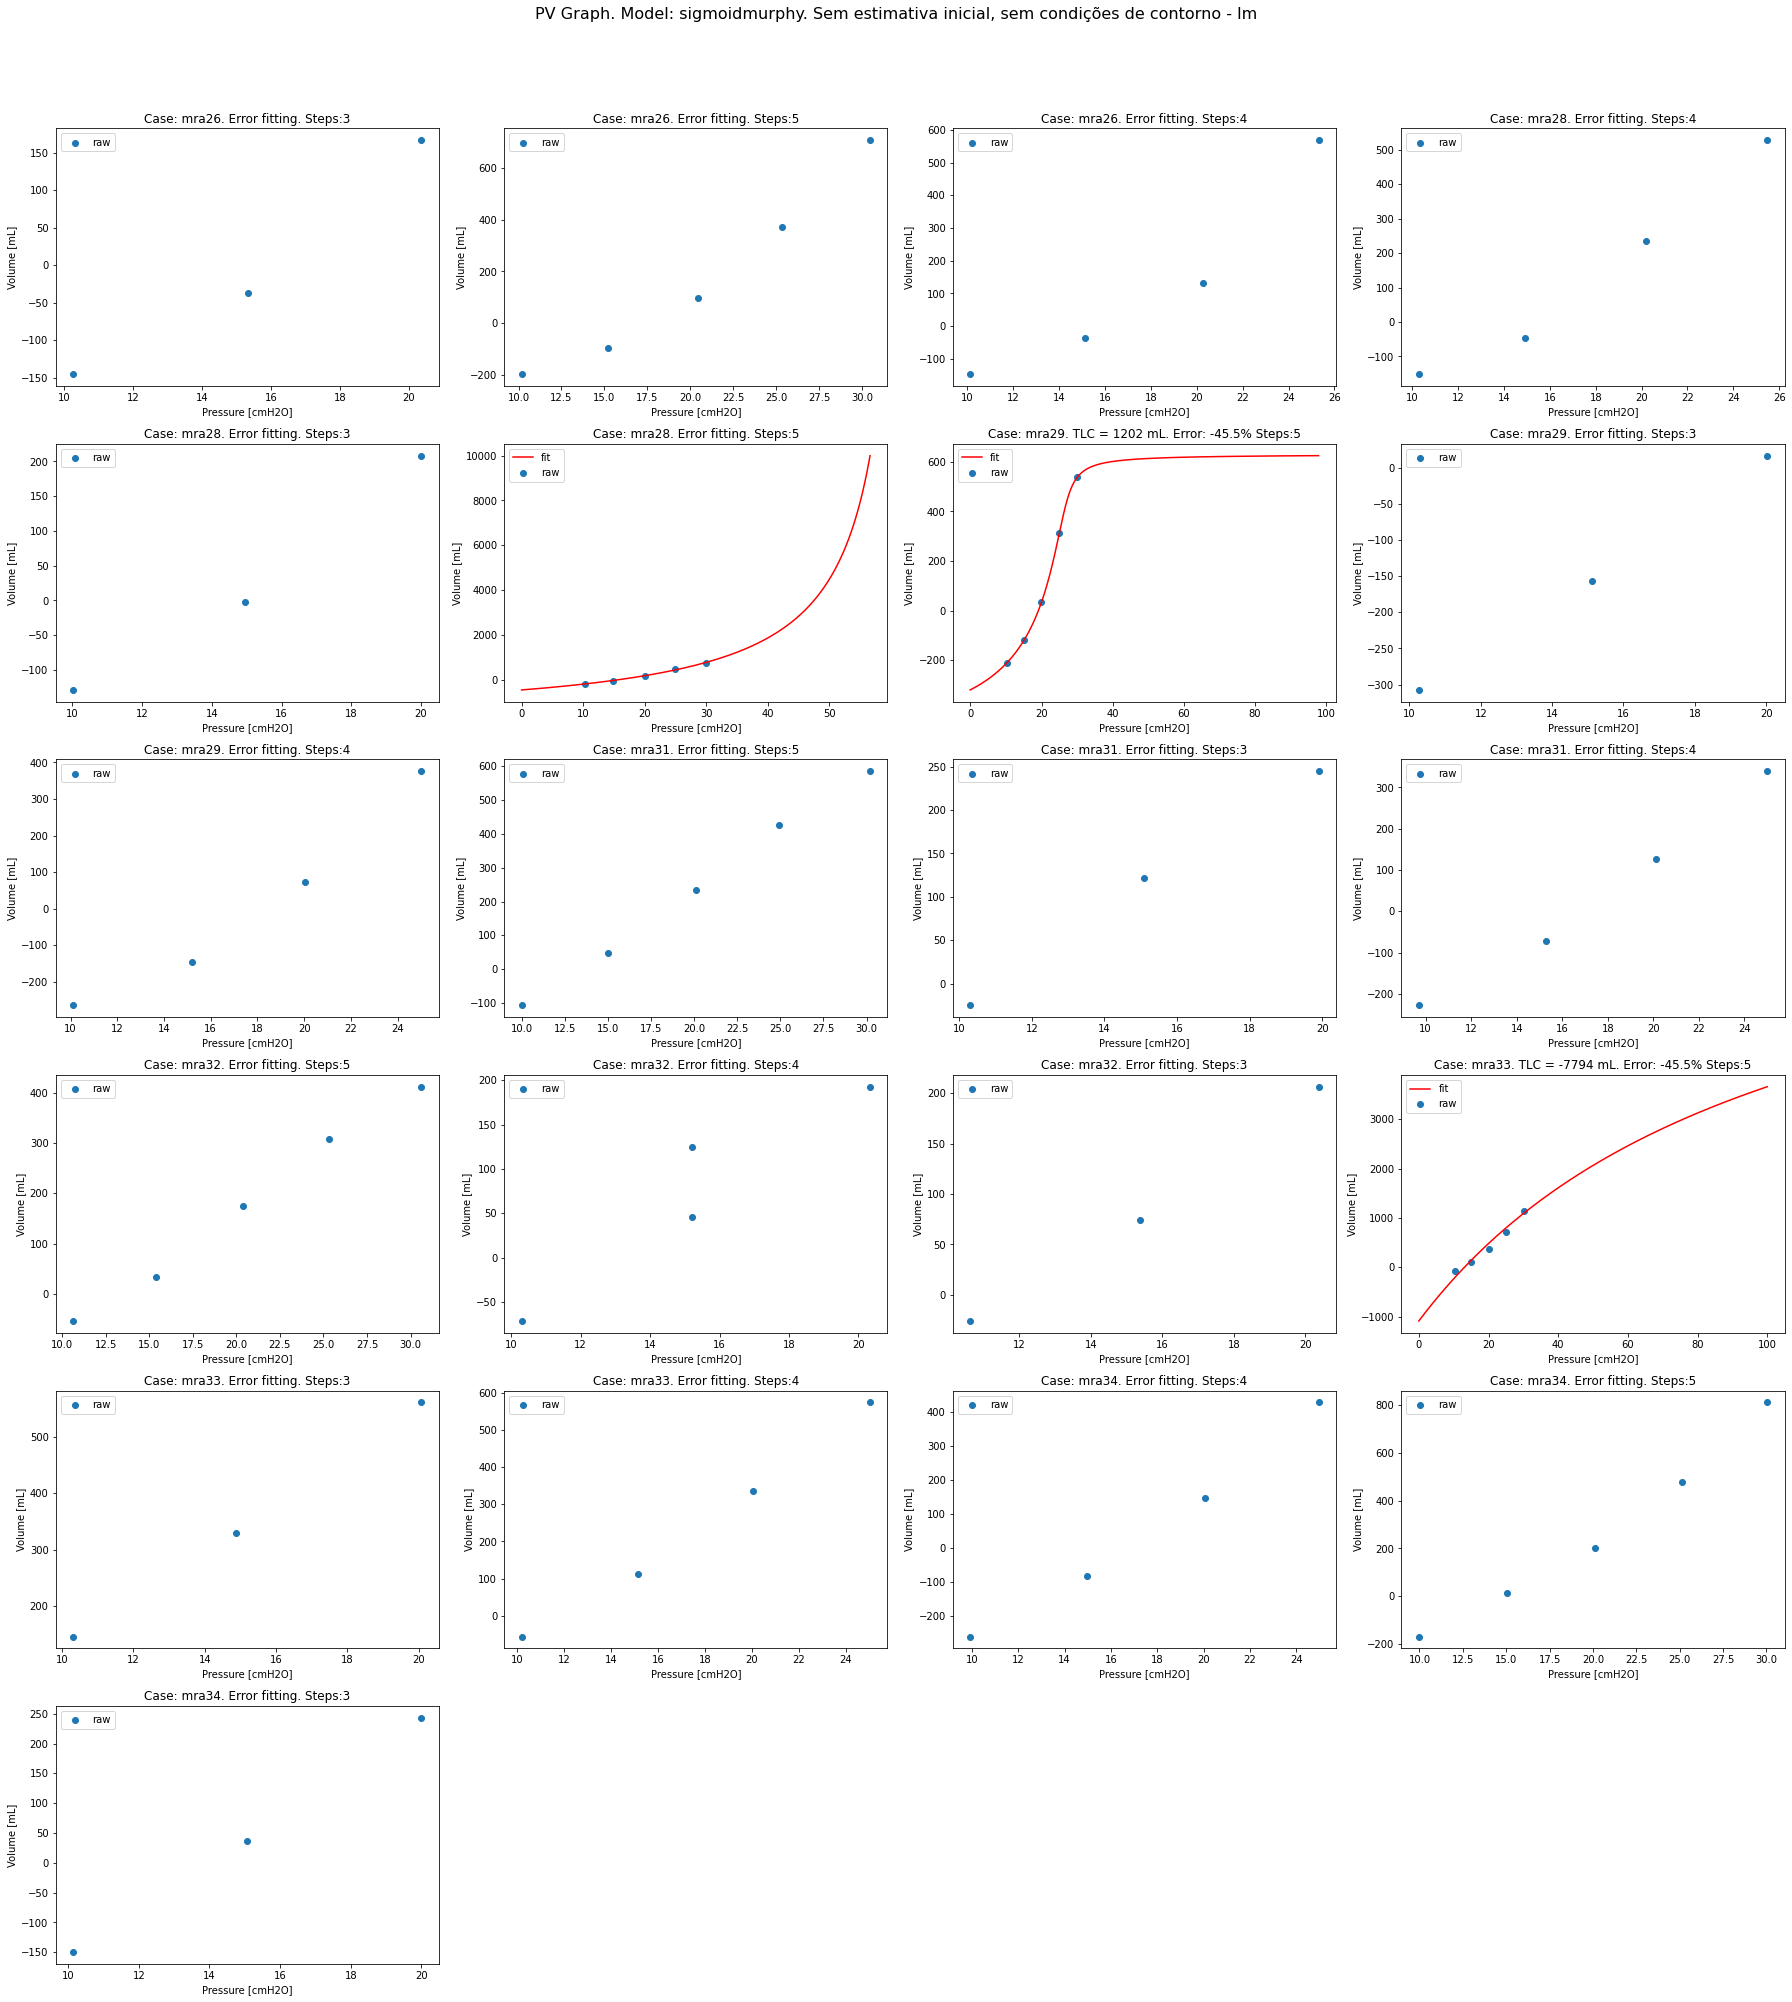

Norma(erro): 45.5. Erro médio: 45.51%. Ajustados: 1.


In [57]:
modelo = m.sigmoidmurphy
metodo = 'lm'
texto = 'Sem estimativa inicial, sem condições de contorno - lm'
TLC_index = 0
invert_PV = True
dadosdf["Modelo"] = ""
dadosdf["Metodo"] = ""
dadosdf["Ajustado"] = ""
dadosdf["Erro"] = ""
_, _, _, df_final = m.testa_modelo(dadosdf, modelo, metodo=metodo, texto=texto, TLC_index=TLC_index, invert_PV=invert_PV, df_final=df_final)
df_resultados = pd.concat([df_resultados, dadosdf], ignore_index=True)

#### Modelo sigmoidmurphy - Sem estimativa inicial, sem condições de contorno.
#### Método dogbox

	Caso 0 (mra26) deu erro... Steps:3
	Caso 1 (mra26) deu erro... Steps:5
Testando caso 2: mra26: [   36.2    36.2  -178.4  -177.0    18.4 ]
	Caso 2 (mra26) deu erro... Steps:4
	Caso 3 (mra28) deu erro... Steps:4
Testando caso 4: mra28: [ -671.1  -671.2  7064.9  7063.7    36.1 ]
	Caso 4 (mra28) deu erro... Steps:3
	Caso 5 (mra28) deu erro... Steps:5
	Caso 6 (mra29) deu erro... Steps:5
	Caso 7 (mra29) deu erro... Steps:3
	Caso 8 (mra29) deu erro... Steps:4
	Caso 9 (mra31) deu erro... Steps:5
	Caso 10 (mra31) deu erro... Steps:3
	Caso 11 (mra31) deu erro... Steps:4
	Caso 12 (mra32) deu erro... Steps:5
Testando caso 13: mra32: [  122.8   -71.5    -3.7 -0.001    13.0 ]
	Caso 14 (mra32) deu erro... Steps:3
	Caso 15 (mra33) deu erro... Steps:5
	Caso 16 (mra33) deu erro... Steps:3
Testando caso 17: mra33: [-1104.1   744.6 36191.8   398.3    44.2 ]
	Caso 18 (mra34) deu erro... Steps:4
	Caso 19 (mra34) deu erro... Steps:5
	Caso 20 (mra34) deu erro... Steps:3


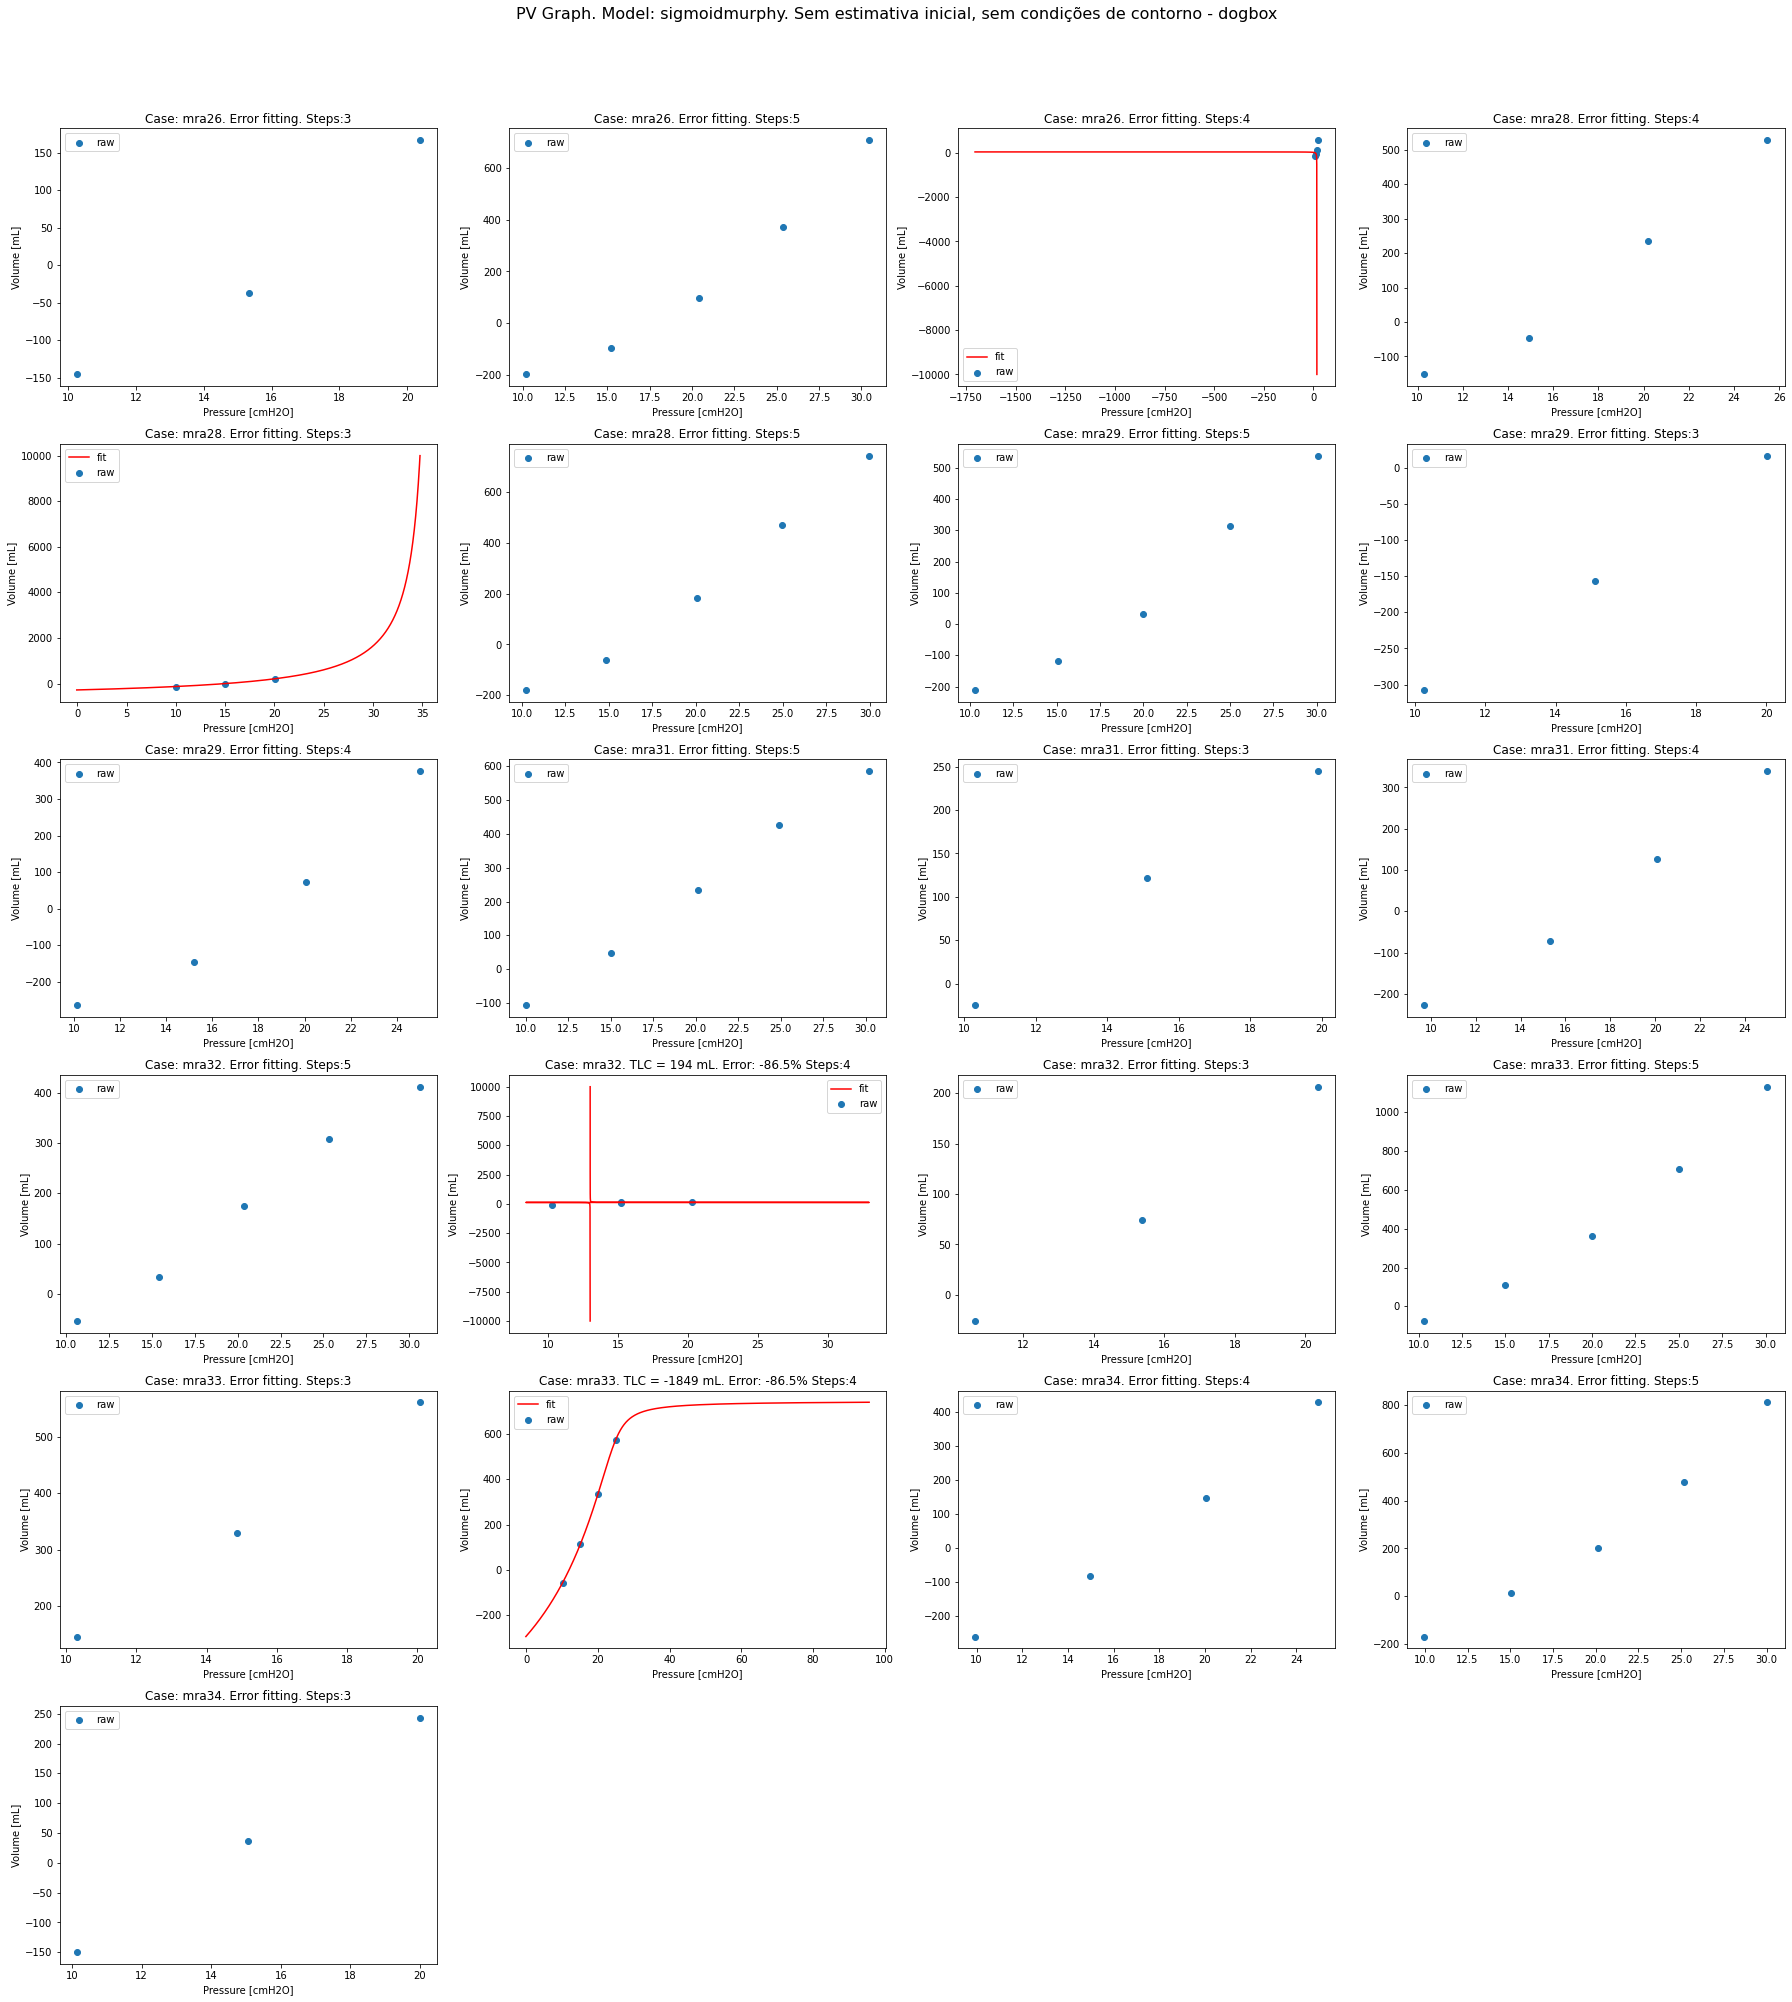

Norma(erro): 86.5. Erro médio: 86.51%. Ajustados: 1.


In [58]:
modelo = m.sigmoidmurphy
metodo = 'dogbox'
texto = 'Sem estimativa inicial, sem condições de contorno - dogbox'
TLC_index = 0
invert_PV = True
dadosdf["Modelo"] = ""
dadosdf["Metodo"] = ""
dadosdf["Ajustado"] = ""
dadosdf["Erro"] = ""
_, _, _, df_final = m.testa_modelo(dadosdf, modelo, metodo=metodo, texto=texto, TLC_index=TLC_index, invert_PV=invert_PV, df_final=df_final)
df_resultados = pd.concat([df_resultados, dadosdf], ignore_index=True)

#### Modelo sigmoidmurphy - Sem estimativa inicial, sem condições de contorno.
#### Método trf

	Caso 0 (mra26) deu erro... Steps:3
Testando caso 1: mra26: [  -36.5   -36.5  -230.8  -236.2    21.4 ]
	Caso 1 (mra26) deu erro... Steps:5
Testando caso 2: mra26: [   36.2    36.2  -176.4  -179.0    18.4 ]
	Caso 2 (mra26) deu erro... Steps:4
Testando caso 3: mra28: [   92.9    92.9  -330.0  -330.0    18.5 ]
	Caso 3 (mra28) deu erro... Steps:4
Testando caso 4: mra28: [ -668.1  -674.3  7064.7  7064.7    36.1 ]
	Caso 4 (mra28) deu erro... Steps:3
Testando caso 5: mra28: [   25.9    25.9  -296.2  -296.2    21.1 ]
	Caso 5 (mra28) deu erro... Steps:5
Testando caso 6: mra29: [  -66.9   -66.8  -191.6  -191.6    21.3 ]
	Caso 6 (mra29) deu erro... Steps:5
	Caso 7 (mra29) deu erro... Steps:3
Testando caso 8: mra29: [  -52.5   -52.5  -257.3  -257.3    18.2 ]
	Caso 8 (mra29) deu erro... Steps:4
	Caso 9 (mra31) deu erro... Steps:5
	Caso 10 (mra31) deu erro... Steps:3
Testando caso 11: mra31: [ -658.0   873.5  7764.7  5194.6    23.1 ]
	Caso 11 (mra31) deu erro... Steps:4
	Caso 12 (mra32) deu erro... 

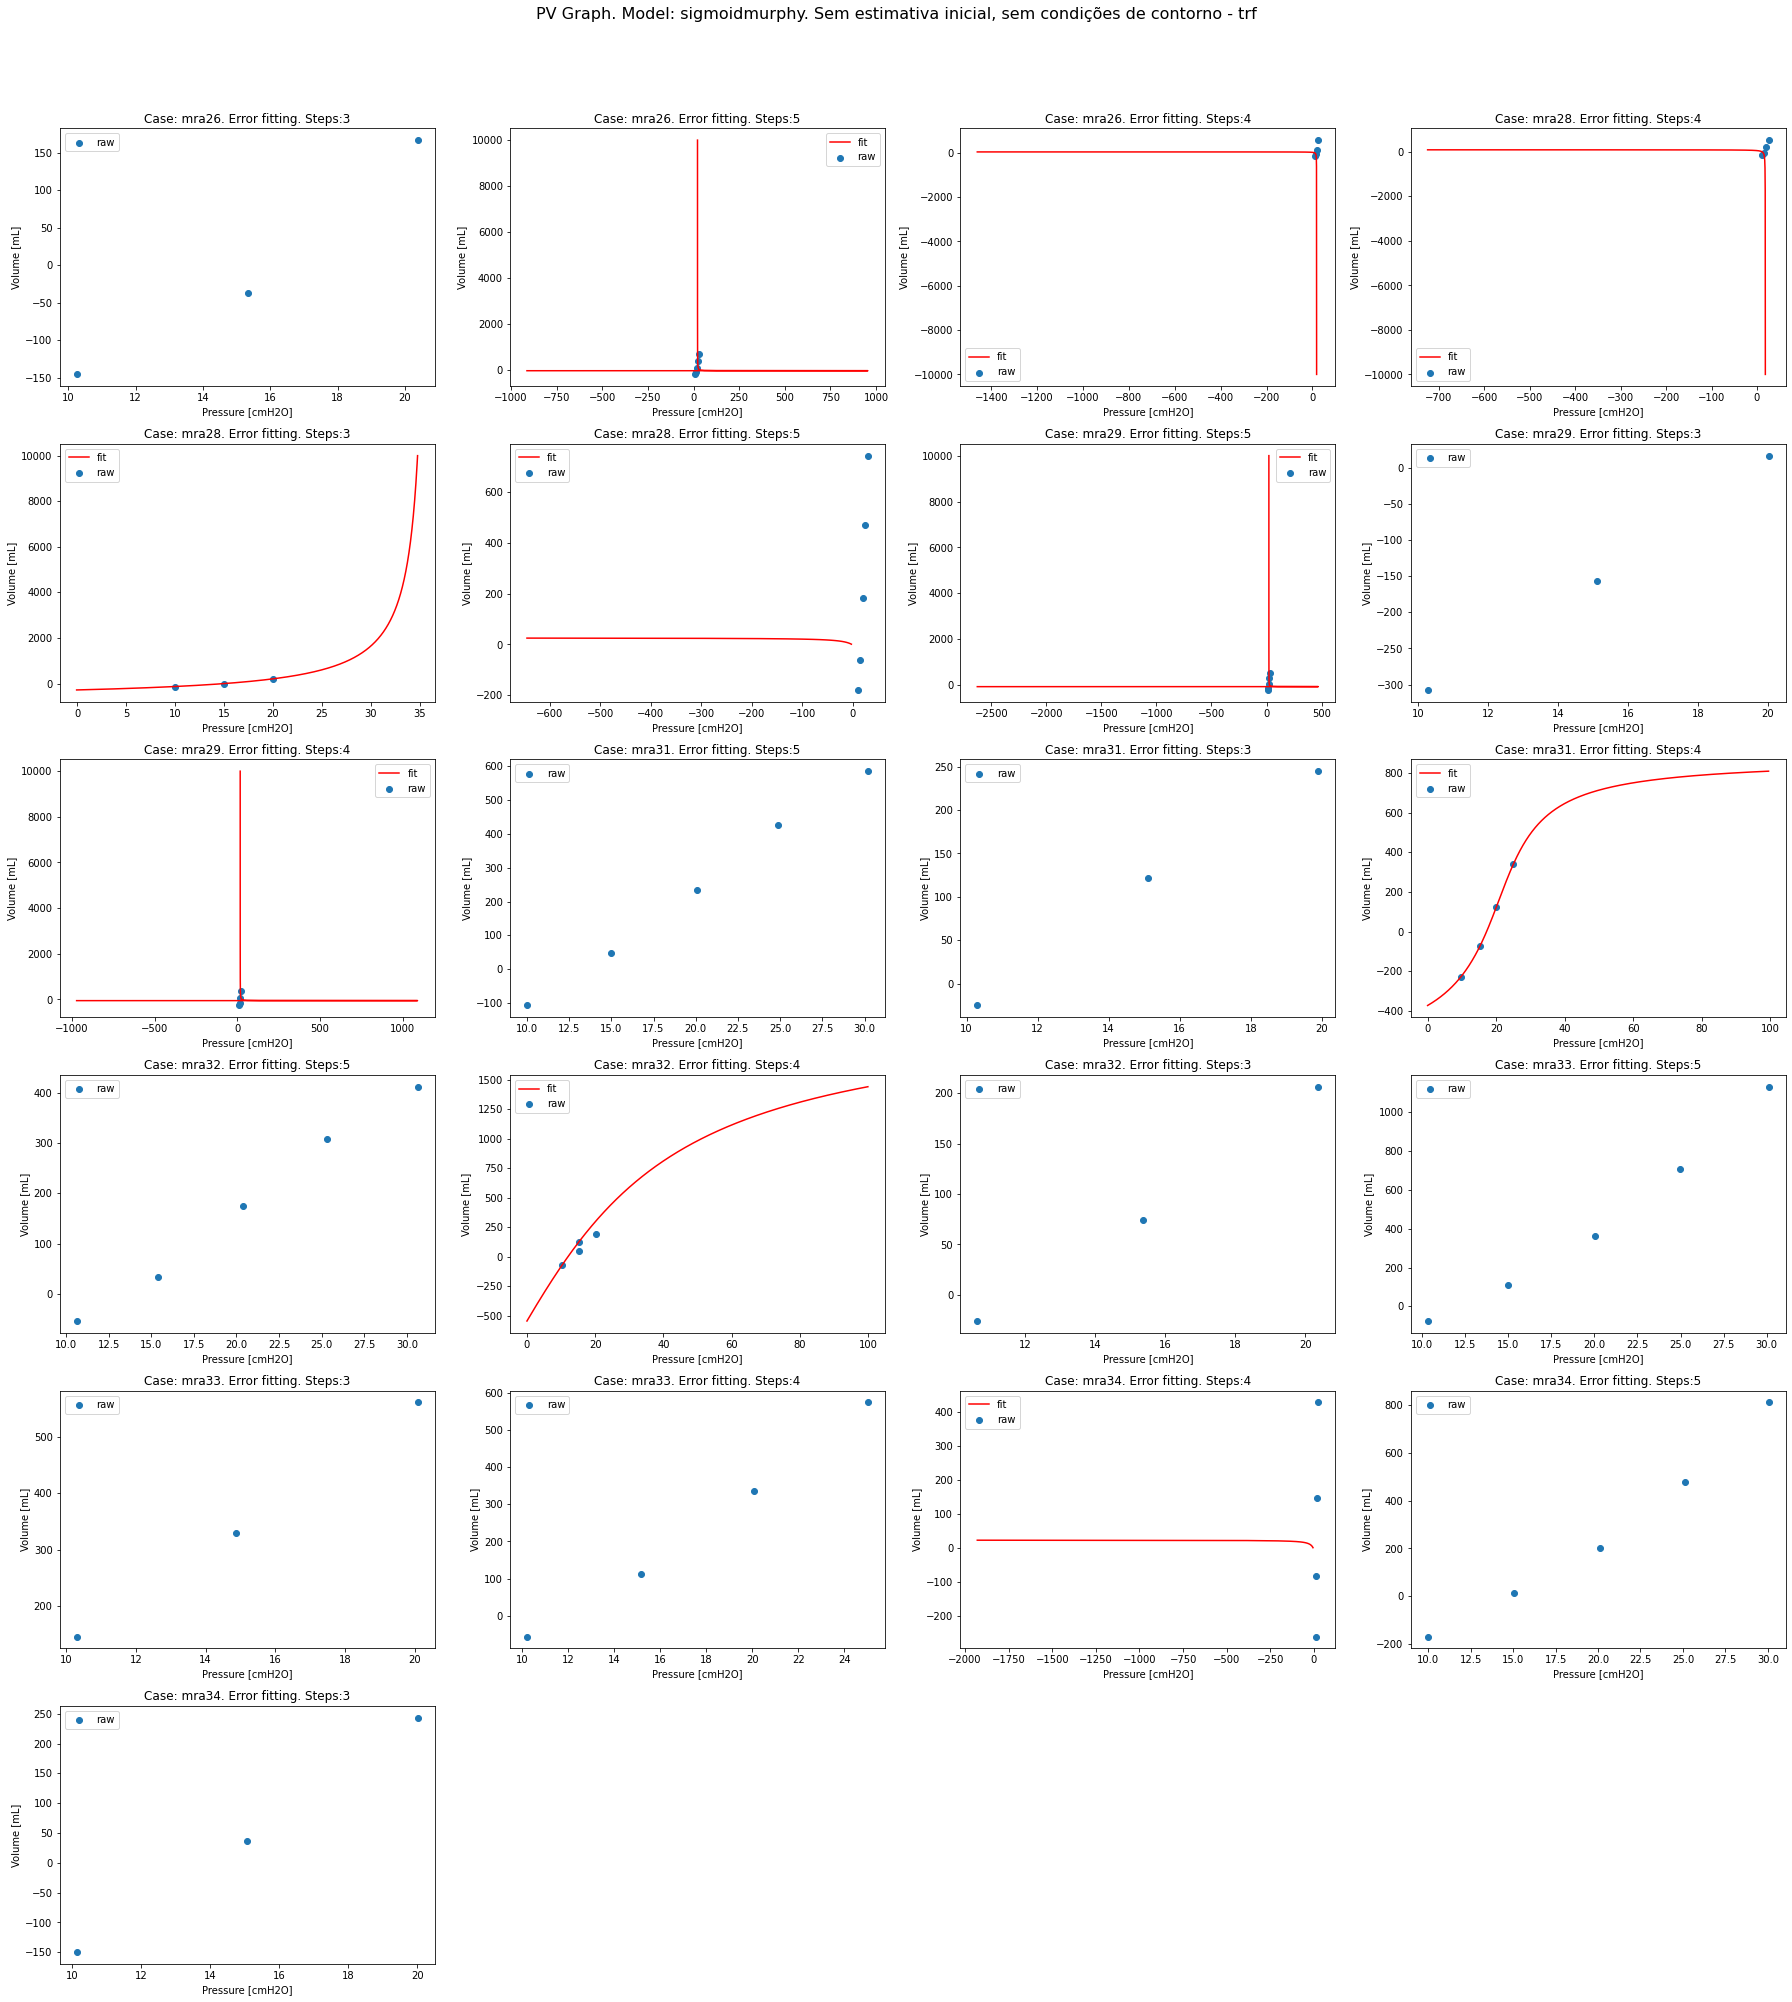

Norma(erro): -1.0. Erro médio: -1.00%. Ajustados: 0.


In [59]:
modelo = m.sigmoidmurphy
metodo = 'trf'
texto = 'Sem estimativa inicial, sem condições de contorno - trf'
TLC_index = 0
invert_PV = True
dadosdf["Modelo"] = ""
dadosdf["Metodo"] = ""
dadosdf["Ajustado"] = ""
dadosdf["Erro"] = ""
_, _, _, df_final = m.testa_modelo(dadosdf, modelo, metodo=metodo, texto=texto, TLC_index=TLC_index, invert_PV=invert_PV, df_final=df_final)
df_resultados = pd.concat([df_resultados, dadosdf], ignore_index=True)

In [60]:
df_modelo_por_ajustados = df_final.groupby('modelo', as_index=False)[['ajustados']].sum()
df_modelo_por_ajustados

,modelo,ajustados
0,sigmoidmurphy,2
1,sigmoidpaivaoffset,1
2,sigmoidvenegas1,34
3,sigmoidvenegas2offset,24


Text(0.5, 0.98, 'Quantidade de Ajustados por Modelo')

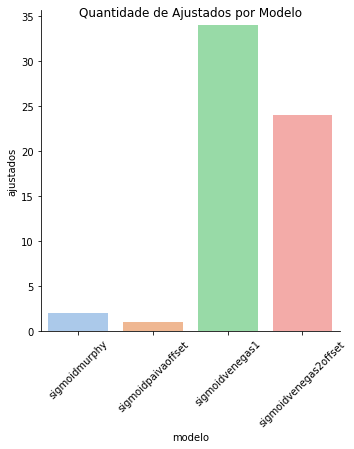

In [61]:
modelosxajustados = sns.catplot(x="modelo", y="ajustados", kind="bar", palette="pastel", data=df_modelo_por_ajustados)#.set_title("Quantidade de Ajustados por Modelo")
modelosxajustados.set_xticklabels(rotation=45).fig.suptitle('Quantidade de Ajustados por Modelo')




In [62]:
df_final

,modelo,metodo,norma_do_erro,erro_medio,ajustados,n_pontos_interpolacao
0,sigmoidvenegas1,lm,159.476650,53.632416,7,0.0
1,sigmoidvenegas1,dogbox,272.325767,72.035056,13,0.0
2,sigmoidvenegas1,trf,255.891016,63.892859,14,0.0
3,sigmoidpaivaoffset,lm,-1.000000,-1.000000,0,0.0
4,sigmoidpaivaoffset,dogbox,-1.000000,-1.000000,0,0.0
5,sigmoidpaivaoffset,trf,79.407229,79.407229,1,0.0
6,sigmoidvenegas2offset,lm,-1.000000,-1.000000,0,0.0
7,sigmoidvenegas2offset,dogbox,264.808016,69.500826,13,0.0
8,sigmoidvenegas2offset,trf,254.566667,73.406563,11,0.0
9,sigmoidmurphy,lm,45.508004,45.508004,1,0.0


Text(0.5, 0.98, 'Erro medio por Modelo')

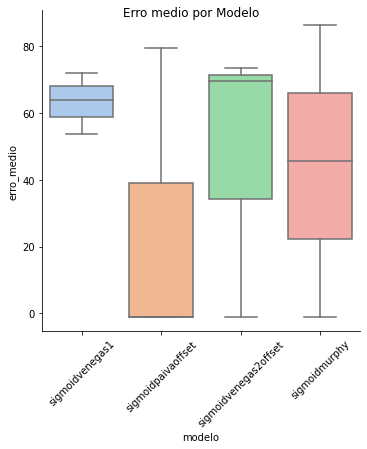

In [63]:
modelosxerro = sns.catplot(x="modelo", y="erro_medio", kind="box", palette="pastel", data=df_final)
modelosxerro.set_xticklabels(rotation=45).fig.suptitle('Erro medio por Modelo')


In [64]:
df_modelo_por_ajustados = df_final.groupby('modelo', as_index=False)[['erro_medio']].median()
df_modelo_por_ajustados

,modelo,erro_medio
0,sigmoidmurphy,45.508004
1,sigmoidpaivaoffset,-1.000000
2,sigmoidvenegas1,63.892859
3,sigmoidvenegas2offset,69.500826


In [65]:
df_resultados.head(5)

,Animal,Manobra,Dados,n_steps,Pressoes,Volumes,volume_esperado,Modelo,Metodo,Ajustado,Erro,n_pontos_interpolacao
0,mra26,B,"[[10.25, -145.76797485351562], [20.61562538146...",3,"[10.25, 15.334375381469727, 20.375]","[-145.76797485351562, -37.26432800292969, 166....",2622.9,sigmoidvenegas1,lm,False,0,0.0
1,mra26,D,"[[10.178125381469727, -197.8517303466797], [20...",5,"[10.178125381469727, 15.212499618530273, 20.42...","[-197.8517303466797, -95.13343811035156, 97.13...",2622.9,sigmoidvenegas1,lm,False,0,0.0
2,mra26,C,"[[10.131250381469727, -147.3227081298828], [20...",4,"[10.131250381469727, 15.112500190734863, 20.27...","[-147.3227081298828, -36.04450607299805, 131.8...",2622.9,sigmoidvenegas1,lm,False,0,0.0
3,mra28,C,"[[10.287500381469727, -152.2864532470703], [20...",4,"[10.287500381469727, 14.931250095367432, 20.21...","[-152.2864532470703, -45.45492172241211, 234.1...",2105.9,sigmoidvenegas1,lm,False,0,0.0
4,mra28,B,"[[10.021874904632568, -128.87612915039062], [2...",3,"[10.021874904632568, 14.962499618530273, 20.01...","[-128.87612915039062, -2.0903725624084473, 208...",2105.9,sigmoidvenegas1,lm,False,0,0.0


#### sigmoidvenegas1 - gráfico por step


In [66]:
sigmoidvenegas1_df = df_resultados.loc[df_resultados['Modelo'] == 'sigmoidvenegas1'].loc[df_resultados['Ajustado'] == True]
sigmoidvenegas1_df

,Animal,Manobra,Dados,n_steps,Pressoes,Volumes,volume_esperado,Modelo,Metodo,Ajustado,Erro,n_pontos_interpolacao
5,mra28,D,"[[10.240625381469727, -179.3195037841797], [20...",5,"[10.240625381469727, 14.828125, 20.05937480926...","[-179.3195037841797, -62.187042236328125, 182....",2105.9,sigmoidvenegas1,lm,True,-34.2708,0.0
8,mra29,C,"[[10.105555534362793, -265.270263671875], [20....",4,"[10.105555534362793, 15.18842601776123, 20.045...","[-265.270263671875, -145.95188903808594, 74.12...",2205.7,sigmoidvenegas1,lm,True,-44.7286,0.0
9,mra31,D,"[[10.0, -107.7169418334961], [20.2000007629394...",5,"[10.0, 15.0, 20.100000381469727, 24.8999996185...","[-107.7169418334961, 47.35507583618164, 235.19...",1974.4,sigmoidvenegas1,lm,True,-42.3767,0.0
11,mra31,C,"[[9.699999809265137, -228.3211212158203], [20....",4,"[9.699999809265137, 15.300000190734863, 20.100...","[-228.3211212158203, -71.18547058105469, 125.5...",1974.4,sigmoidvenegas1,lm,True,-45.7617,0.0
12,mra32,D,"[[10.625260829925537, -53.54884338378906], [20...",5,"[10.625260829925537, 15.398958206176758, 20.37...","[-53.54884338378906, 33.332923889160156, 174.5...",1440.2,sigmoidvenegas1,lm,True,-55.9207,0.0
15,mra33,D,"[[10.312239646911621, -75.62246704101562], [20...",5,"[10.312239646911621, 14.991406440734863, 20.00...","[-75.62246704101562, 107.81485748291016, 363.4...",2154.6,sigmoidvenegas1,lm,True,118.802,0.0
17,mra33,C,"[[10.202864646911621, -56.06181335449219], [20...",4,"[10.202864646911621, 15.145573139190674, 20.05...","[-56.06181335449219, 113.50151824951172, 334.8...",2154.6,sigmoidvenegas1,lm,True,-33.5664,0.0
22,mra26,D,"[[10.178125381469727, -197.8517303466797], [20...",5,"[10.178125381469727, 15.212499618530273, 20.42...","[-197.8517303466797, -95.13343811035156, 97.13...",2622.9,sigmoidvenegas1,dogbox,True,-35.3537,0.0
24,mra28,C,"[[10.287500381469727, -152.2864532470703], [20...",4,"[10.287500381469727, 14.931250095367432, 20.21...","[-152.2864532470703, -45.45492172241211, 234.1...",2105.9,sigmoidvenegas1,dogbox,True,-77.3454,0.0
25,mra28,B,"[[10.021874904632568, -128.87612915039062], [2...",3,"[10.021874904632568, 14.962499618530273, 20.01...","[-128.87612915039062, -2.0903725624084473, 208...",2105.9,sigmoidvenegas1,dogbox,True,-83.9854,0.0


,Animal,Manobra,Dados,Pressoes,Volumes,volume_esperado,Modelo,Metodo,Ajustado,Erro,n_pontos_interpolacao
n_steps,,,,,,,,,,,
3,9,9,9,9,9,9,9,9,9,9,9
4,11,11,11,11,11,11,11,11,11,11,11
5,14,14,14,14,14,14,14,14,14,14,14


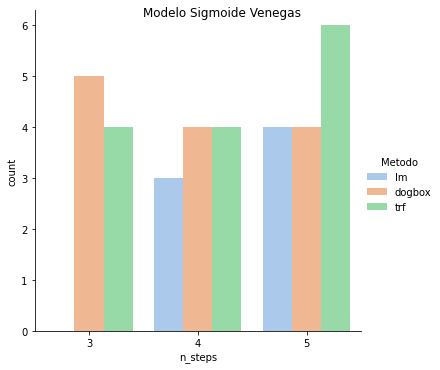

In [67]:
stepsxajustados = sns.catplot(x="n_steps", kind="count", hue="Metodo",
            palette="pastel", data=sigmoidvenegas1_df).fig.suptitle('Modelo Sigmoide Venegas')



sigmoidvenegas1_df.groupby('n_steps').count()


In [68]:
sigmoidvenegas1_df.groupby('Metodo').count()

,Animal,Manobra,Dados,n_steps,Pressoes,Volumes,volume_esperado,Modelo,Ajustado,Erro,n_pontos_interpolacao
Metodo,,,,,,,,,,,
dogbox,13,13,13,13,13,13,13,13,13,13,13
lm,7,7,7,7,7,7,7,7,7,7,7
trf,14,14,14,14,14,14,14,14,14,14,14


#### sigmoidpaivaoffset - gráfico por step

In [69]:
sigmoidpaivaoffset_df = df_resultados.loc[df_resultados['Modelo'] == 'sigmoidpaivaoffset'].loc[df_resultados['Ajustado'] == True]
sigmoidpaivaoffset_df.head(5)

,Animal,Manobra,Dados,n_steps,Pressoes,Volumes,volume_esperado,Modelo,Metodo,Ajustado,Erro,n_pontos_interpolacao
121,mra33,B,"[[10.303646087646484, 146.587890625], [20.1421...",3,"[10.303646087646484, 14.871094226837158, 20.07...","[146.587890625, 330.3841552734375, 560.5339355...",2154.6,sigmoidpaivaoffset,trf,True,-79.4072,0.0


,Animal,Manobra,Dados,Pressoes,Volumes,volume_esperado,Modelo,Metodo,Ajustado,Erro,n_pontos_interpolacao
n_steps,,,,,,,,,,,
3,1,1,1,1,1,1,1,1,1,1,1


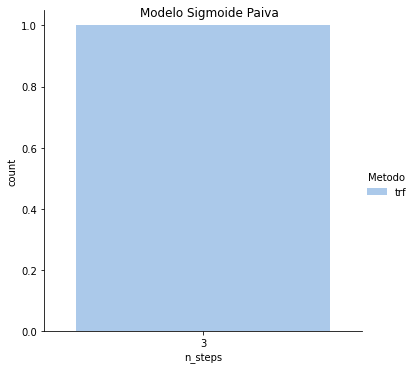

In [70]:
stepsxajustados_1 = sns.catplot(x="n_steps", kind="count", hue="Metodo",
            palette="pastel", data=sigmoidpaivaoffset_df).fig.suptitle('Modelo Sigmoide Paiva')

sigmoidpaivaoffset_df.groupby('n_steps').count()

In [71]:
sigmoidpaivaoffset_df.groupby('Metodo').count()

,Animal,Manobra,Dados,n_steps,Pressoes,Volumes,volume_esperado,Modelo,Ajustado,Erro,n_pontos_interpolacao
Metodo,,,,,,,,,,,
trf,1,1,1,1,1,1,1,1,1,1,1


#### sigmoidvenegas2offset - gráfico por step

In [72]:
sigmoidvenegas2offset_df = df_resultados.loc[df_resultados['Modelo'] == 'sigmoidvenegas2offset'].loc[df_resultados['Ajustado'] == True]
sigmoidvenegas2offset_df.head(5)

,Animal,Manobra,Dados,n_steps,Pressoes,Volumes,volume_esperado,Modelo,Metodo,Ajustado,Erro,n_pontos_interpolacao
148,mra26,D,"[[10.178125381469727, -197.8517303466797], [20...",5,"[10.178125381469727, 15.212499618530273, 20.42...","[-197.8517303466797, -95.13343811035156, 97.13...",2622.9,sigmoidvenegas2offset,dogbox,True,-35.3537,0.0
149,mra26,C,"[[10.131250381469727, -147.3227081298828], [20...",4,"[10.131250381469727, 15.112500190734863, 20.27...","[-147.3227081298828, -36.04450607299805, 131.8...",2622.9,sigmoidvenegas2offset,dogbox,True,-74.8593,0.0
151,mra28,B,"[[10.021874904632568, -128.87612915039062], [2...",3,"[10.021874904632568, 14.962499618530273, 20.01...","[-128.87612915039062, -2.0903725624084473, 208...",2105.9,sigmoidvenegas2offset,dogbox,True,-83.9854,0.0
155,mra29,C,"[[10.105555534362793, -265.270263671875], [20....",4,"[10.105555534362793, 15.18842601776123, 20.045...","[-265.270263671875, -145.95188903808594, 74.12...",2205.7,sigmoidvenegas2offset,dogbox,True,-44.7286,0.0
156,mra31,D,"[[10.0, -107.7169418334961], [20.2000007629394...",5,"[10.0, 15.0, 20.100000381469727, 24.8999996185...","[-107.7169418334961, 47.35507583618164, 235.19...",1974.4,sigmoidvenegas2offset,dogbox,True,-77.2957,0.0


,Animal,Manobra,Dados,Pressoes,Volumes,volume_esperado,Modelo,Metodo,Ajustado,Erro,n_pontos_interpolacao
n_steps,,,,,,,,,,,
3,9,9,9,9,9,9,9,9,9,9,9
4,7,7,7,7,7,7,7,7,7,7,7
5,8,8,8,8,8,8,8,8,8,8,8


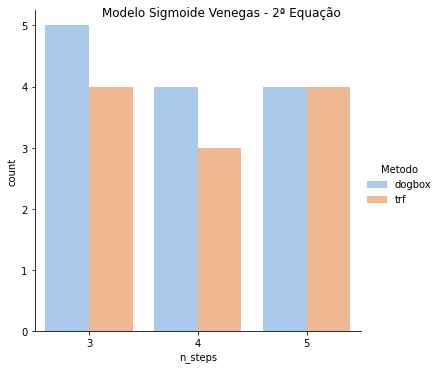

In [73]:
stepsxajustados_2 = sns.catplot(x="n_steps", kind="count", hue="Metodo",
            palette="pastel", data=sigmoidvenegas2offset_df).fig.suptitle('Modelo Sigmoide Venegas - 2ª Equação')

sigmoidvenegas2offset_df.groupby('n_steps').count()

In [74]:
sigmoidvenegas2offset_df.groupby('Metodo').count()

,Animal,Manobra,Dados,n_steps,Pressoes,Volumes,volume_esperado,Modelo,Ajustado,Erro,n_pontos_interpolacao
Metodo,,,,,,,,,,,
dogbox,13,13,13,13,13,13,13,13,13,13,13
trf,11,11,11,11,11,11,11,11,11,11,11


#### sigmoidmurphy - gráfico por step

In [75]:
sigmoidmurphy_df = df_resultados.loc[df_resultados['Modelo'] == 'sigmoidmurphy'].loc[df_resultados['Ajustado'] == True]
sigmoidmurphy_df.head(5)

,Animal,Manobra,Dados,n_steps,Pressoes,Volumes,volume_esperado,Modelo,Metodo,Ajustado,Erro,n_pontos_interpolacao
195,mra29,D,"[[10.286250114440918, -210.43722534179688], [2...",5,"[10.286250114440918, 15.094120502471924, 19.99...","[-210.43722534179688, -118.89096069335938, 33....",2205.7,sigmoidmurphy,lm,True,-45.508,0.0
223,mra32,C,"[[10.299739837646484, -71.4944076538086], [20....",4,"[10.299739837646484, 15.213281631469727, 20.33...","[-71.4944076538086, 46.17720031738281, 192.731...",1440.2,sigmoidmurphy,dogbox,True,-86.5084,0.0


,Animal,Manobra,Dados,Pressoes,Volumes,volume_esperado,Modelo,Metodo,Ajustado,Erro,n_pontos_interpolacao
n_steps,,,,,,,,,,,
4,1,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,1,1


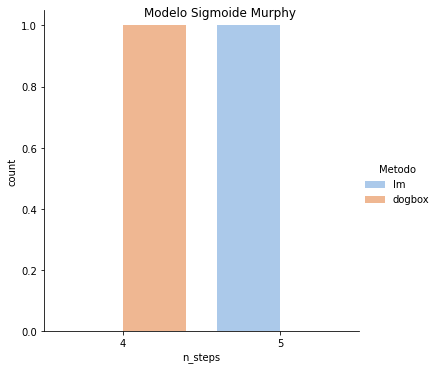

In [76]:
stepsxajustados_3 = sns.catplot(x="n_steps", kind="count", hue="Metodo",
            palette="pastel", data=sigmoidmurphy_df).fig.suptitle('Modelo Sigmoide Murphy')

sigmoidmurphy_df.groupby('n_steps').count()

In [34]:
sigmoidmurphy_df.groupby('Metodo').count()

,Animal,Manobra,Dados,n_steps,Pressoes,Volumes,volume_esperado,Modelo,Ajustado,Erro,n_pontos_interpolacao
Metodo,,,,,,,,,,,
dogbox,4,4,4,4,4,4,4,4,4,4,4
lm,3,3,3,3,3,3,3,3,3,3,3
trf,10,10,10,10,10,10,10,10,10,10,10
